## 美国房价分析与预测报告——基于Zillow经济数据

* 日期：2020年6月23日
* 作者：周嘉楠
* 学号：19210980081
* 专业：大数据国际商务

### 概述

房地产业是美国国民经济的重要组成部分，是重要的基础产业。1992年美国房地产业与整体国民经济的比例关系为：房地产业产值占所有产业产值之比为0.95%,房地产业的工资总额与所有产业工资总额之和的比例为1.2%，房地产业就业人口与所有产业总就业人口的比例为1.3%。1997年这些比例分别为房地产业产值占0.94%, 工资额占1.2%, 就业人口占1.3%。虽然1992年与1997年的具体数字不同，但房地产业与整体国民经济的比例关系几乎完全一致，这不是偶然的，它说明了两个问题：一是房地产业发展与整体国民经济发展配合得非常协调，二是反映了房地产业与整体国民经济的合理比例关系，保持这种比例就足于满足生产和生活对房地产的需求。因为房地产业是作为生产和生活场所存在的，它的发展速度决定于经济增长和人们生活水平提高对其提出的需求。

<center>
    <img style="border-radius: 0.3125em;
    box-shadow: 0 2px 4px 0 rgba(34,36,38,.12),0 2px 10px 0 rgba(34,36,38,.08);"
    src="https://jrothschild.oss-cn-shanghai.aliyuncs.com/%E7%BE%8E%E5%9B%BD%E6%88%BF%E4%BB%B7.jpg">
    <br>
    <div style="color:orange; border-bottom: 1px solid #d9d9d9;
    display: inline-block;
    color: #999;
    padding: 2px;">1890-2020年美国房价走势图</div>
</center>

在过去的二十年里，美国房地产业伴随着社会的整体国民经济发展，基本保持平稳向上的发展趋势。美国房地产业也表现出周期性，一般是18~20年左右经历一个周期循环，但周期波动幅度较小，较少大起大落。美国主要房地产参考指数之一的“NCREIF指数”从近20年来的表现情况来看, 美国房地产投资回报呈现出平稳增长趋势，这也表明美国房地产市场是一个理性成熟的市场。从长线投资来看，在美国投资房地产具有风险低、收益稳定、回报率高等特点。

本文将使用Zillow经济数据集分析美国房价具体情况，这是一份由Zillow的经济研究团队收集、整理和发布来自各种公共和专有资源的住房和经济数据，其中包括地方政府存档的不动产档案资料，包括契约合同、房屋登记信息和交易历史。文章将对房价数据集进行深入分析，探索美国房价的历史走势，并选取最具代表性的加利福尼亚州房价数据集，使用七种机器学习模型对房价进行预测。

### 目录

一. 数据描述

    1. 导入数据
    2. 不同年份房屋每平方英尺价格变化
    3. 不同年份每平方英尺挂牌价格的中位数
    4. 不同年份每平方英尺租金的中位数
    5. 不同户型房屋的每年价格变化情况
    6. 不同州的房屋每平方英尺价格的中位数
    
二. 数据分析

    1. 美国主要州的房价走势
    2. 不同州的房屋挂牌数量树状图
    3. 三种层级的房屋价格走势
    4. 房屋售价与在Zillow网站上挂牌时间的关系
    5. Zillow房屋销售价格指数与全美房屋售价中位数之间的线性关系
    6. 房屋租赁价格与在Zillow网站上挂牌时间的关系
    7. Zillow房屋租赁价格指数与全美房屋租赁中位数之间的线性关系
    8. 不同户型每平方英尺售价走势
    9. 房价上涨与下跌比例的变化情况
    10. 美国2002年至2017年的房屋买卖损益分析
    11. 美国各州2010年至2017年的房屋降价季节性调整
    12. 美国各州2010年至2017年的不同户型房屋租赁价格中位数的变化
    13. 金融危机过后美国五大州的房屋销售价格增长的时间序列
    
三. 建立模型
    
    1. 数据导入与纵览
    2. 数据预处理
    3. 建立模型
        3.1 线性回归模型：Linear Regression Model
        3.2 多项式回归模型：Polynomial regression Model
        3.3 Lasso回归模型：Lasso Regression Model
        3.4 弹性网回归模型：Elastic Nets Regression Model
        3.5 岭回归模型：Ridge Regression Model
        3.6 决策树模型：Decision Trees Model
        3.7 随机森林模型：Random Forest Model
    4. 模型综合对比
    
四. 结论与建议

* ZHVI指标的原文介绍：
> Zillow Home Value Index (ZHVI): A smoothed seasonally adjusted measure of the median estimated home value across a given region and housing type. A dollar denominated alternative to repeat-sales indices. Find a more detailed methodology here: http://www.zillow.com/research/zhvi-methodology-6032/
* ZRI指标的原文介绍：
> Zillow Rent Index (ZRI): A smoothed seasonally adjusted measure of the median estimated market rate rent across a given region and housing type. A dollar denominated alternative to repeat-rent indices. Find a more detailed methodology here: http://www.zillow.com/research/zillow-rent-index-methodology-2393/

### 第一部分 数据描述
#### 1.1 导入数据
    1. City_time_series.csv
    2. cities_crosswalk.csv

In [33]:
# 导入所需的第三方库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import math
import matplotlib
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
import squarify
from subprocess import check_output
import seaborn as sns
from IPython.display import Image, display, HTML
import plotly
import plotly.offline as py
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.figure_factory as fig_fact
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import  Ridge
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# 导入数据'City_time_series.csv'
df_city_time_seris = pd.read_csv('./Zillow Data/City_time_series.csv')
# 显示前5行
df_city_time_seris.head()

Date          RegionName  InventorySeasonallyAdjusted_AllHomes  \
0  1996-04-30  abbottstownadamspa                                   NaN   
1  1996-04-30   aberdeenbinghamid                                   NaN   
2  1996-04-30   aberdeenharfordmd                                   NaN   
3  1996-04-30    aberdeenmonroems                                   NaN   
4  1996-04-30     aberdeenmoorenc                                   NaN   

   InventoryRaw_AllHomes  MedianListingPricePerSqft_1Bedroom  \
0                    NaN                                 NaN   
1                    NaN                                 NaN   
2                    NaN                                 NaN   
3                    NaN                                 NaN   
4                    NaN                                 NaN   

   MedianListingPricePerSqft_2Bedroom  MedianListingPricePerSqft_3Bedroom  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

   MedianListingPricePerSqft_4Bedroom  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   

   MedianListingPricePerSqft_5BedroomOrMore  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   MedianListingPricePerSqft_AllHomes  ...  ZHVI_BottomTier  ZHVI_CondoCoop  \
0                                 NaN  ...              NaN             NaN   
1                                 NaN  ...              NaN             NaN   
2                                 NaN  ...          81300.0        137900.0   
3                                 NaN  ...              NaN             NaN   
4                                 NaN  ...              NaN             NaN   

   ZHVI_MiddleTier  ZHVI_SingleFamilyResidence  ZHVI_TopTier  ZRI_AllHomes  \
0              NaN                         NaN      108700.0           NaN   
1              NaN                         NaN      168400.0           NaN   
2         109600.0                    108600.0      147900.0           NaN   
3              NaN                         NaN       74500.0           NaN   
4              NaN                         NaN      131100.0           NaN   

   ZRI_AllHomesPlusMultifamily  ZriPerSqft_AllHomes  \
0                          NaN                  NaN   
1                          NaN                  NaN   
2                          NaN                  NaN   
3                          NaN                  NaN   
4                          NaN                  NaN   

   Zri_MultiFamilyResidenceRental  Zri_SingleFamilyResidenceRental  
0                             NaN                              NaN  
1                             NaN                              NaN  
2                             NaN                              NaN  
3                             NaN                              NaN  
4                             NaN                              NaN  

[5 rows x 81 columns]

In [3]:
# 导入数据'cities_crosswalk.csv'
df_cities_crosswalk = pd.read_csv('./Zillow Data/cities_crosswalk.csv')
# 显示前5行
df_cities_crosswalk.head()

Unique_City_ID            City     County State
0   oak_grovechristianky       Oak Grove  Christian    KY
1  jarvisburgcurritucknc      Jarvisburg  Currituck    NC
2   mcminnvilleyamhillor     McMinnville    Yamhill    OR
3   union_townshiperiepa  Union Township       Erie    PA
4     oshkoshwinnebagowi         Oshkosh  Winnebago    WI

#### 1.2 不同年份房屋每平方英尺价格变化
* 计算方式：将给定地区每套房屋Zillow上的估价除以房屋的面积。

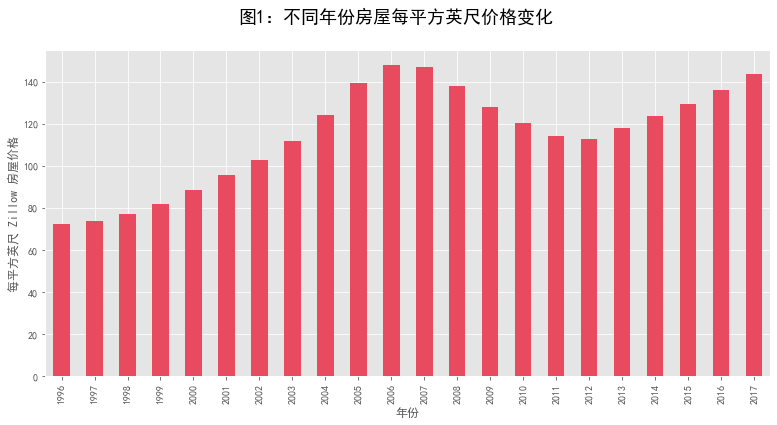

In [4]:
# 画柱状图：不同年份房屋每平方英尺价格变化
df_city_time_seris.Date = pd.to_datetime(df_city_time_seris.Date)
df_city_time_seris.groupby(df_city_time_seris.Date.dt.year)['ZHVIPerSqft_AllHomes']\
    .mean().plot(kind='bar',color='#e84a5f',figsize=(13, 6))
plt.suptitle('图1：不同年份房屋每平方英尺价格变化', fontsize=18)
plt.ylabel('每平方英尺 Zillow 房屋价格')
plt.xlabel('年份')
plt.show()

从图1可以看到，在2007年之前，美国房屋平均价格一路飙升，Zillow房价指数(ZHVI)从1996年的78上涨到2006年的143，这10年间涨幅高达83.3%，
直到2008年因房价引起的全球金融危机的爆发，ZHVI一直下跌到2012年才重新恢复上涨，而这5年间由2007年的142下跌至2012年的112，跌幅为21.13%，
截止到2017年，ZHVI指数达到了142，已经恢复到金融危机前的最高点。

#### 1.3 不同年份每平方英尺挂牌价格的中位数
* 计算方式：Zillow上挂牌价格的中位数除以房屋的面积。

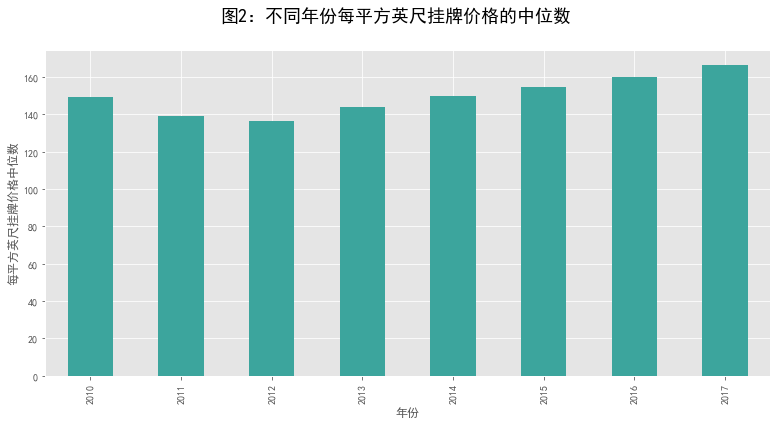

In [5]:
# 画柱状图：不同年份每平方英尺挂牌价格的中位数
df_city_time_seris_without_null = df_city_time_seris.dropna(subset=['MedianListingPricePerSqft_AllHomes'], how='any')
df_city_time_seris_without_null.groupby(df_city_time_seris_without_null.Date.dt.year)\
    ['MedianListingPricePerSqft_AllHomes'].mean().plot(kind='bar',color='#3ca59d',figsize=(13, 6))
plt.suptitle('图2：不同年份每平方英尺挂牌价格的中位数', fontsize=18)
plt.ylabel('每平方英尺挂牌价格中位数')
plt.xlabel('年份')
plt.show()

从图2中我们可以得知，不同年份每平方英尺挂牌价格的中位数在2010年至2017年之间变化不大，其变化趋势也是与美国整体的经济形势走势相同，值得注意的是，
不同于全国均价，价格中位数已经超越了2010年的前期高点，创下了历史新高。

#### 1.4 不同年份每平方英尺租金的中位数
* 计算方式：Zillow上挂牌出租的房屋每平方英尺租金的中位数。

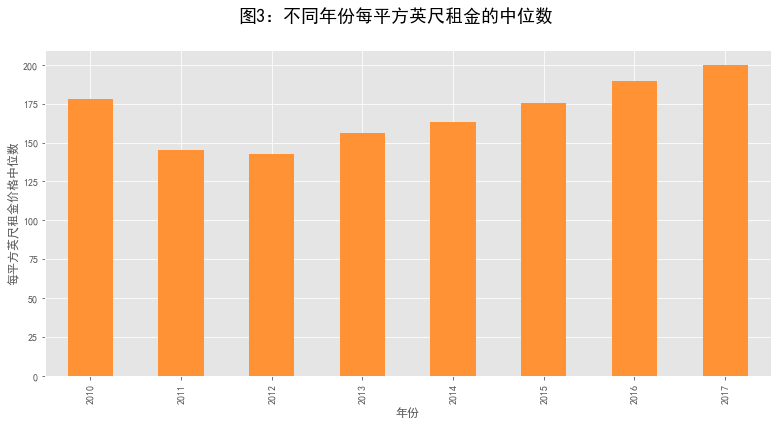

In [6]:
# 画柱状图：不同年份每平方英尺租金的中位数
df_city_time_seris_without_null_rent = df_city_time_seris.dropna(subset=['MedianRentalPricePerSqft_AllHomes'], how='any')
df_city_time_seris_without_null_rent.groupby(df_city_time_seris_without_null_rent.Date.dt.year)\
    ['MedianListingPricePerSqft_AllHomes'].mean().plot(kind='bar', color='#ff9234',figsize=(13, 6))
plt.suptitle('图3：不同年份每平方英尺租金的中位数', fontsize=18)
plt.ylabel('每平方英尺租金价格中位数')
plt.xlabel('年份')
plt.show()

从图3中可以看出，房屋的平均租金的ZHVI指数要高于平均售价的ZHVI指数，同时从2010年到2012年每年的变化幅度也大于同时期平均售价的变化幅度，其整体
走势与平均售价的走势是相同的。

#### 1.5 不同户型房屋的每年价格变化情况
* Zillow上的房屋包括很多户型，如有2、3、4个卧室的房屋，下面就探索一下不同户型房屋的价格变化趋势。

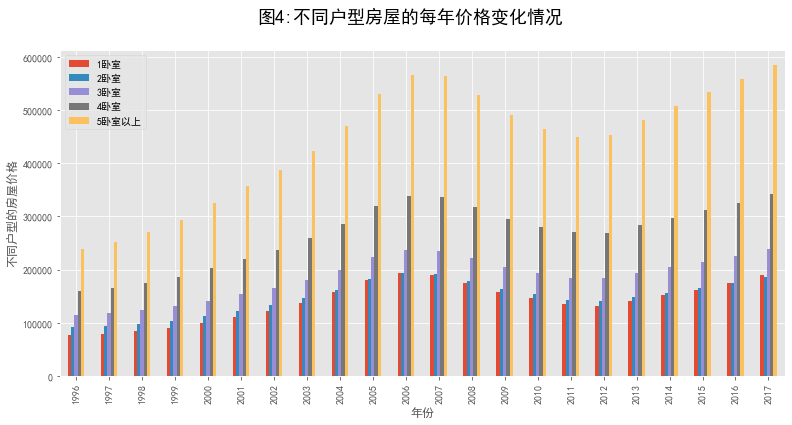

In [7]:
# 画柱状图：不同户型房屋的每年价格变化情况
df_city_time_seris.groupby(df_city_time_seris.Date.dt.year)[['ZHVI_1bedroom','ZHVI_2bedroom','ZHVI_3bedroom','ZHVI_4bedroom','ZHVI_5BedroomOrMore']]\
    .mean().plot(kind='bar', figsize=(13, 6))
plt.legend(['1卧室','2卧室','3卧室','4卧室','5卧室以上'])
plt.suptitle("图4:不同户型房屋的每年价格变化情况", fontsize=18)
plt.ylabel('不同户型的房屋价格')
plt.xlabel('年份')
plt.show()

图4展示了不同户型房屋的每年价格变化情况，显而易见的是随着卧室数量的增多，房屋价格有非常明显的上升，其中从4个卧室到5个卧室之间价格相差幅度最大，
但也可以看到当价格发生波动时，5卧室的房屋价格也是振幅最大的，整体而言他们的变化方向和趋势是呈相同方向的。值得注意的是，1卧室房屋和2卧室房屋价格
走势相当有趣，由于1卧室和2卧室是人们最常居住的户型，所以市场需求量较大，在1996年-2006年之间，1卧室房屋与2卧室房屋的价格相差越来越小，直到
2006年两者的价格居然相等了，这也是证明房地产市场的白热化，导致人们对1卧室房屋投资和居住需求明显增大，但后来的金融危机使得1卧室房屋与2卧室房屋
的价格又回归了正常差距，直到2012年房地产市场复苏后，1卧室房屋价格又呈现了猛烈的上升态势，2016年两者价格又一次持平，而2017年1卧室房屋价格甚至
超越了2卧室房屋的价格！这是否又意味着房地产市场的过热呢？是一个值得深入思考的问题。

#### 1.6 不同州的房屋每平方英尺价格中位数的分布情况
* 统计Ziilow房屋在不同州的价格分布情况

In [8]:
# 以ZHVIpersqft的平均价格对地区名称进行分组
df_regi_zhvi_sq_mean = df_city_time_seris.groupby(df_city_time_seris.RegionName)['ZHVIPerSqft_AllHomes'].mean().reset_index(name = "ZHVIpersqft_mean")
df_regi_zhvi_sq_mean = df_regi_zhvi_sq_mean.dropna(subset=['ZHVIpersqft_mean'], how='any')

# 画出地图分布
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],
       [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_regi_zhvi_sq_mean['RegionName'],
        z = df_regi_zhvi_sq_mean['ZHVIpersqft_mean'].astype(float),
        locationmode = 'USA-states',
        text = 'Median home value per square foot',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Home value per square foot")
        )]

layout = dict(
        title = '图5.Median of the value of all homes per square foot in different states',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
py.iplot(fig, filename='d3-cloropleth-map')

图5是一个动态交互的地图型可视化组件，由Plotly制作，可以看到美国所有州的房屋每平方英尺价格中位数的分布情况，从图中可以清晰地看到，CA（加利福尼亚州）
和HI（夏威夷州）的房价中位数是最高的，其次是NY、VA、MA、NJ等美国东北部地区，这非常符合美国的经济发展分布情况，其中加利福尼亚州和夏威夷是经典的
度假胜地，以高档别墅和度假酒店为主要房地产业态，是全球房价最高的地点之一；而纽约、曼哈顿这种地区是美国经济发展的核心区域，也是寸土寸金，房价当然是
理所应当的高。

### 第二部分 数据分析
#### 2.1 美国主要州的房价走势
* 本部分主要统计了美国最知名的五大洲房价走势：
>  1. CA-California
   2. DC-District of Columbia
   3. HI-Hawaii
   4. MA-Massachusetts
   5. NJ-New Jersey

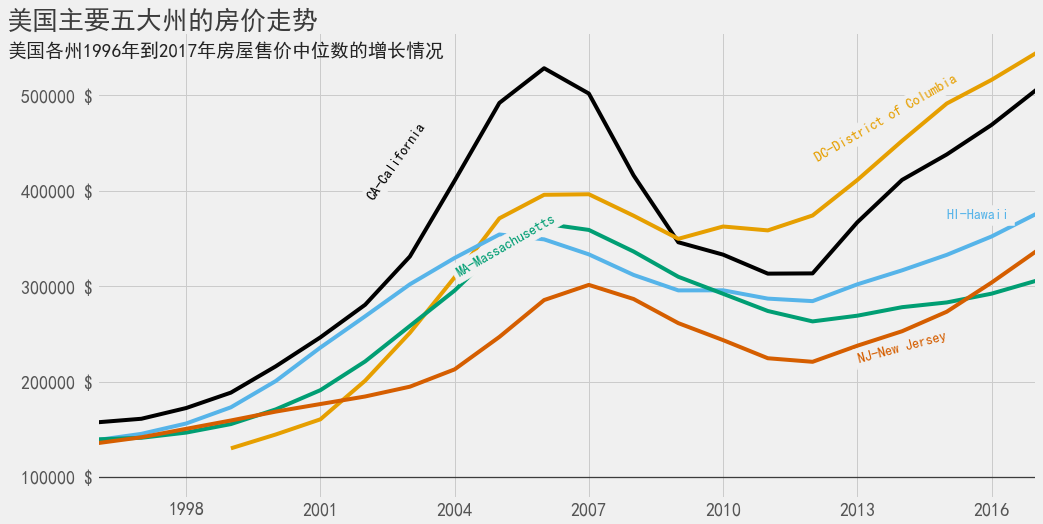

In [9]:
plt.style.use('fivethirtyeight')

# 读取'State_time_series.csv'数据
State_time_series=pd.read_csv("./Zillow Data/State_time_series.csv",parse_dates=True)
State_time_series.Date=pd.to_datetime(State_time_series.Date)
State_time_series['year'] = State_time_series.Date.dt.year

# 处理各州房价数据
states = set(State_time_series[~State_time_series['ZHVI_AllHomes'].isnull() & \
                               ~State_time_series['Sale_Prices'].isnull()]['RegionName'].values)
State_time_series_year = State_time_series[State_time_series['RegionName'].isin(states)].copy()
highest_cost_states = State_time_series_year[['RegionName', 'ZHVI_AllHomes']].groupby('RegionName')\
                          .max().sort_values(by=['ZHVI_AllHomes'], ascending=False)[:5].index.values.tolist()
State_time_series_year=State_time_series_year[State_time_series_year.RegionName.isin(highest_cost_states)]
State_time_series_year.year = State_time_series_year.Date.dt.year

# 设置颜色集合
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255],[0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

States_year_SalePrices=State_time_series_year.groupby([State_time_series_year.year,State_time_series_year.RegionName])['ZHVI_AllHomes'].mean().dropna().reset_index(name='SoldPrice')
fte_graph=States_year_SalePrices.pivot(index='year', columns='RegionName', values='SoldPrice').plot(figsize=(15,8), color=colors, legend=False)
fte_graph.figure.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.xlabel("")
fte_graph.set_yticklabels(labels = [-10, '100000 $', '200000 $',  '300000 $', '400000 $', '500000 $'])

# 画出X轴坐标线
fte_graph.axhline(y = 100000, color = 'black', linewidth = 1.3, alpha = .7)
# 设置X轴取值范围
fte_graph.set_xlim(left = 1996, right = 2017)

# 添加图表标题
fte_graph.text(x = 1994, y = 570000, s = "美国主要五大州的房价走势",fontsize = 26, weight = 'bold', alpha = .75)
fte_graph.text(x = 1994, y = 540000, s = '美国各州1996年到2017年房屋售价中位数的增长情况',fontsize = 19, alpha = .85)

# 添加彩色图例
fte_graph.text(x = 2002, y = 390000, s = 'CA-California', color = colors[0], weight = 'bold', rotation = 55, backgroundcolor = '#f0f0f0')
fte_graph.text(x = 2012, y = 430000, s = 'DC-District of Columbia', color = colors[1], weight = 'bold', rotation = 30,backgroundcolor = '#f0f0f0')
fte_graph.text(x = 2015, y = 370000, s = 'HI-Hawaii', color = colors[2], weight = 'bold', rotation = 0,backgroundcolor = '#f0f0f0')
fte_graph.text(x = 2004, y = 310000, s = 'MA-Massachusetts', color = colors[3], weight = 'bold', rotation = 30,backgroundcolor = '#f0f0f0')
fte_graph.text(x = 2013, y = 220000, s = 'NJ-New Jersey', color = colors[4], weight = 'bold',  rotation = 15,backgroundcolor = '#f0f0f0');

从美国主要五大州的房价走势可以看出，这与第一部分的最后一小节分析相一致，图中的五条折线代表了美国房价最高的五大洲，分别是CA、DC、HI、NJ、MA，可以看到其中加利福尼亚州的房屋售价自1998年至2007年金融危机之前都是占据了第一名的位置，而在房产泡沫最严重的2006年，其涨幅也是全国第一，随后的危机给房价带来的重创是非常严重的，使得加利福尼亚州的房价下跌了66.67%，跌幅同样是全国第一，而后随着房地产市场的复苏，加州再也没有回到昔日的辉煌状态，目前全美房价最高的是哥伦比亚州，加州名列第二。

#### 2.2 美国各州的房屋挂牌数量树状图
* 本部分以树状图的形式统计了美国各个州挂牌房屋的数量：面积越大代表数量越多，同时颜色越浅代表数量越少

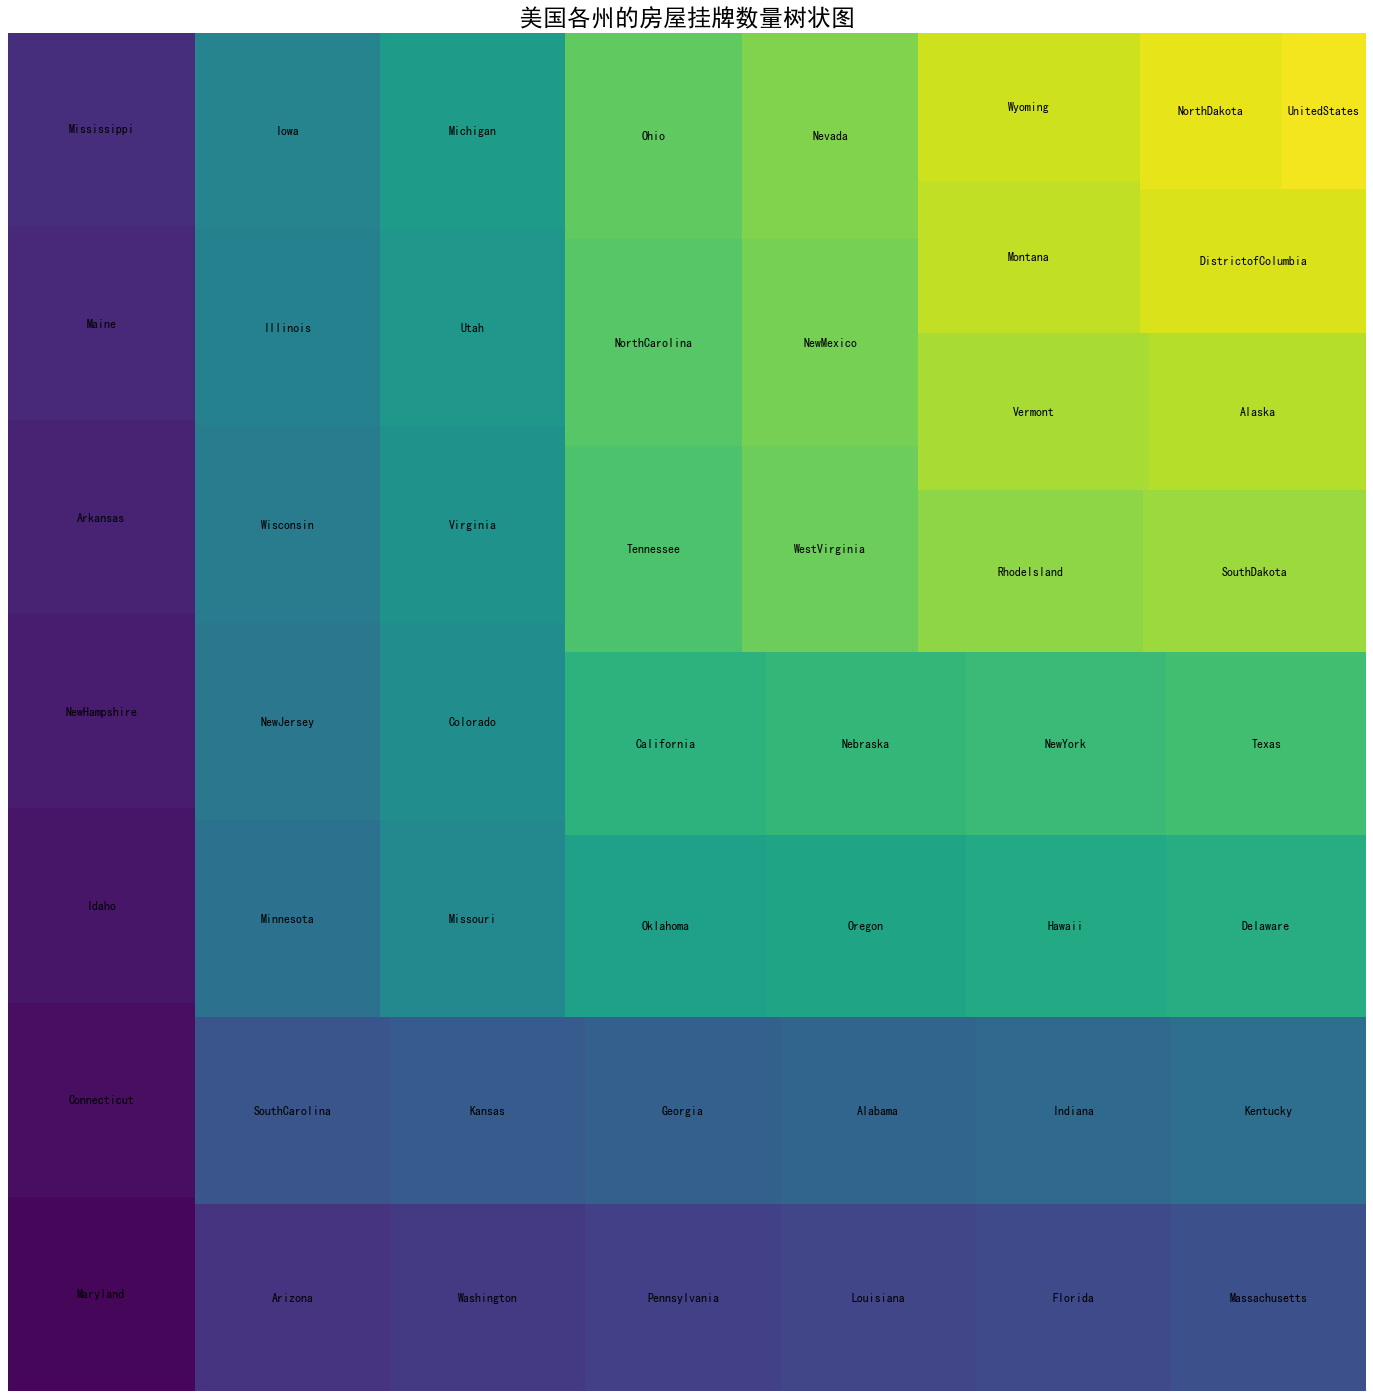

In [68]:
fig = plt.figure(figsize=(25, 21))
regions=State_time_series.RegionName.value_counts().to_frame()
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=regions['RegionName'].values,label=regions.index,color=sns.color_palette('viridis', 52), alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.title("美国各州的房屋挂牌数量树状图", fontsize=24)
plt.show()

上图是美国各州的房屋挂牌数量树状图，以美观且直观的方式展现了全美五十个州房屋在Zillow网站上的挂牌数量，面积越大、颜色越深代表数量越多，而面积越小、颜色越浅代表数量越少，可以看到全美五十个州之间的差距并不算大，除了最右上角浅黄色的北达科他州数量相对较少，证明Zillow在选取数据时并不存在样本失衡的情况。

#### 2.3 美国三种层级的房屋价格走势
* 本部分统计了美国顶层、中层、底层三种不同阶层房屋的ZHVI价格指数走势

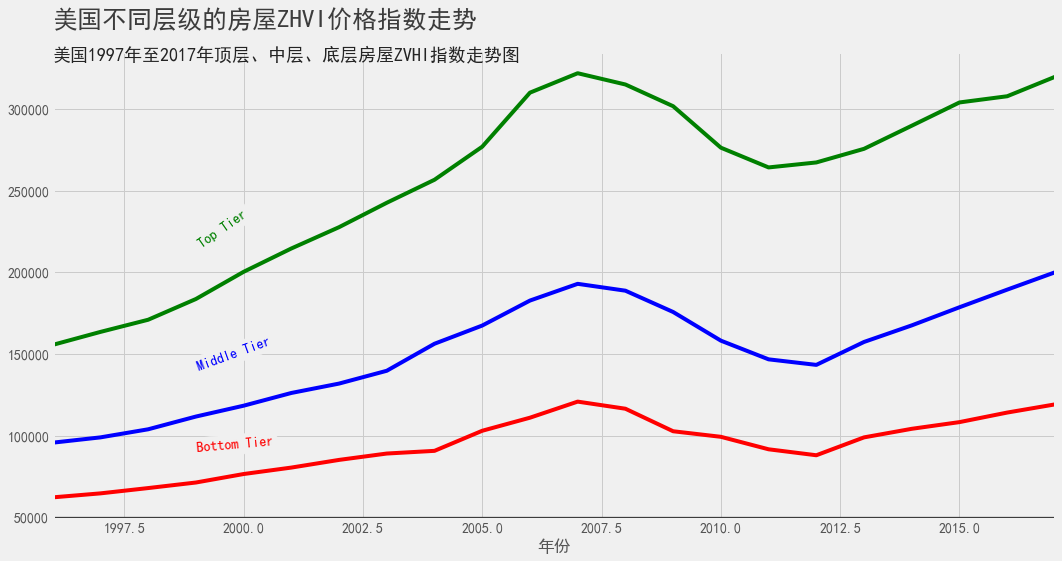

In [11]:
# 画出折线图：美国三种层级的房屋价格走势
plt.figure(figsize=(16,8))
State_time_series.groupby(State_time_series['year'])['ZHVI_TopTier'].median().plot(linewidth=4,c='g')
State_time_series.groupby(State_time_series['year'])['ZHVI_MiddleTier'].median().plot(linewidth=4,c='b')
State_time_series.groupby(State_time_series['year'])['ZHVI_BottomTier'].median().plot(linewidth=4,c='r')

plt.axhline(y = 50000, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = 1996, right = 2017)
plt.xlabel('年份')
plt.text(x = 1996, y = 350000, s = "美国不同层级的房屋ZHVI价格指数走势",fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 1996, y = 330000,s = '美国1997年至2017年顶层、中层、底层房屋ZVHI指数走势图',fontsize = 18, alpha = .85)
plt.text(x = 1999, y = 215000, s = 'Top Tier', color = 'g', weight = 'bold', rotation = 35,backgroundcolor = '#f0f0f0')
plt.text(x = 1999, y = 140000, s = 'Middle Tier', color = 'b', weight = 'bold', rotation = 20,backgroundcolor = '#f0f0f0')
plt.text(x = 1999, y = 90000, s = 'Bottom Tier', color = 'r', weight = 'bold', rotation = 5,backgroundcolor = '#f0f0f0')
plt.show()

从美国三种层级的房屋价格走势的折线图可以看出，三种层级的房屋整体走势的方向是相同的，都跟随美国整体经济的变化而波动，在1997年初，顶层房屋价格指数在150000美元附近，中层房屋价格指数在100000美元附近，而底层房屋价格指数在60000附近，在房地产泡沫最鼎盛的2007年5月份，三种层级房屋的价格指数差距达到了最大化，顶级房屋价格指数冲到了330000美元左右，而底层房屋价格指数仅在130000美元左右，两者差距从一开始的90000美元增加到了200000美元。

#### 2.4 房屋售价与在Zillow网站上挂牌时间的关系
* 本部分统计了美国房屋自挂在Zillow网站上随着天数的增加其ZHVI价格指数走势

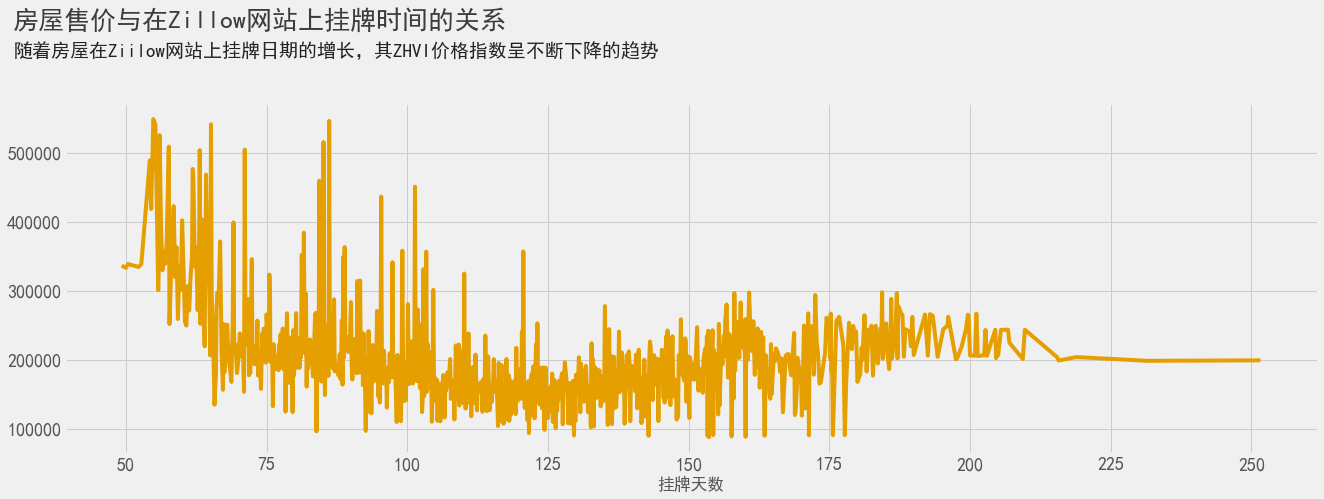

In [12]:
# 画出折线图：房屋售价与在Zillow网站上挂牌时间的关系
plt.figure(figsize=(20, 6))
mean_group = State_time_series[['DaysOnZillow_AllHomes','ZHVI_AllHomes']].groupby(['DaysOnZillow_AllHomes'])['ZHVI_AllHomes'].mean()
plt.plot(mean_group , color=[230/255,159/255,0])
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.xlabel('挂牌天数')
plt.text(x = 30, y = 680000, s = "房屋售价与在Zillow网站上挂牌时间的关系",fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = 30, y = 640000,s = '随着房屋在Ziilow网站上挂牌日期的增长，其ZHVI价格指数呈不断下降的趋势',fontsize = 19, alpha = .85)
plt.show()

房屋售价与在Zillow网站上挂牌时间的折线关系图清晰地展示了随着房屋在Ziilow网站上挂牌日期的增长，其ZHVI价格指数呈不断下降的趋势。有趣的是，如果仔细观察，在最初的55天内，房屋价格是向上增长的，这表明了人们在出售房屋时最初总是乐观的，希望自己的房屋卖一个好的价钱，甚至会后悔自己最初挂牌价比预期的要少，但是随着时间的推移，久久不能出售的房屋在第75天时价格达到了低谷，其降价幅度参考最高点时达到了65%-80%，而后会有一定的小幅反弹，如果房屋在200天时依然无法出售，则房屋主人将会逐渐对房屋失去信心，甚至不再维护Zillow上的价格，在图上的直观表现即为210天后价格变成了一条直线。

#### 2.5 Zillow房屋销售价格指数与全美房屋售价中位数之间的线性关系
* 本部分使用散点图探索了随着挂牌日期的增加，Zillow房屋销售价格指数与全美房屋售价中位数之间的关系

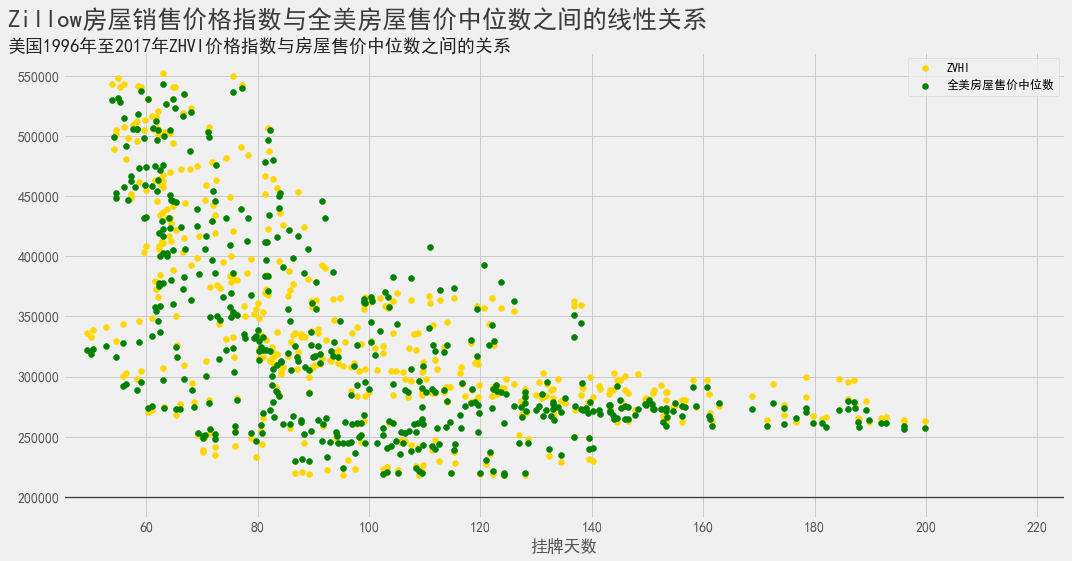

In [13]:
# 画出散点图：Zillow房屋销售价格指数与全美房屋售价中位数之间的线性关系
plt.figure(figsize=(16,8))
plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.ZHVI_AllHomes,c="gold",label="ZVHI")
plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.Sale_Prices,c="green",label="全美房屋售价中位数")

plt.axhline(y = 200000, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = 45, right = 225)
plt.legend(fontsize=12,loc='best',frameon=1,fancybox=1)
plt.xlabel('挂牌天数')
plt.text(x = 35, y = 590000, s = "Zillow房屋销售价格指数与全美房屋售价中位数之间的线性关系",fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 35, y = 570000,s = '美国1996年至2017年ZHVI价格指数与房屋售价中位数之间的关系',fontsize = 18, alpha = .85)
plt.show()

#### 2.6 房屋租赁价格与在Zillow网站上挂牌时间的关系
* 本部分统计了美国房屋自挂在Zillow网站上随着天数的增加其ZRI租赁价格指数走势

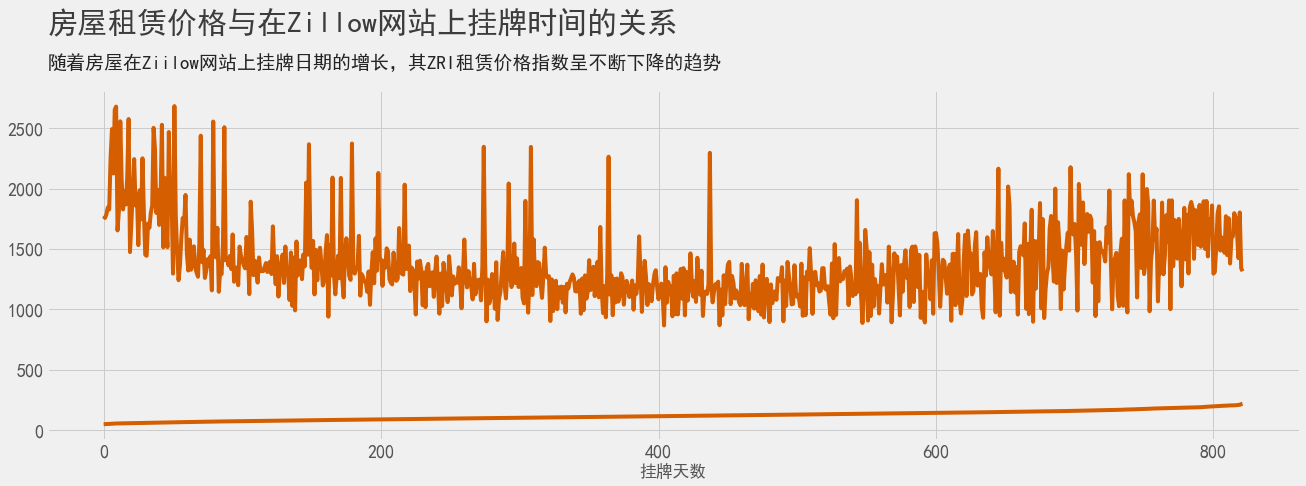

In [14]:
# 画出折线图：房屋租赁价格与在Zillow网站上挂牌时间的关系
plt.figure(figsize=(20,6))
mean_group = State_time_series[['DaysOnZillow_AllHomes','ZRI_AllHomes']].groupby(['DaysOnZillow_AllHomes'])['ZRI_AllHomes'].mean().dropna().reset_index(name='ZRI_AllHomes_Mean')
mean_group = mean_group[(mean_group.DaysOnZillow_AllHomes < 250)]
mean_group = mean_group[(mean_group.ZRI_AllHomes_Mean > 500)]

plt.plot(mean_group , color=[213/255,94/255,0])
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.xlabel('挂牌天数')
plt.text(x = -40, y = 3300, s = "房屋租赁价格与在Zillow网站上挂牌时间的关系",fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -40, y = 3000,s = '随着房屋在Ziilow网站上挂牌日期的增长，其ZRI租赁价格指数呈不断下降的趋势',fontsize = 19, alpha = .85)
plt.show()

房屋租赁价格与在Zillow网站上挂牌时间的关系图展示了美国房屋自挂在Zillow网站上随着天数的增加其ZRI租赁价格指数走势，与销售房屋不同，房屋租赁在美国是更普遍的现象，而挂牌日期最长也达到了800天，证明Zillow的房屋出租是一项比较长久的业务。同样地从最初的50天内，房屋价格会有剧烈的向上跳价现象，后期随着时间的推移逐渐下降，租赁价格在250天左右达到了最低点，比最高点下降了60%左右，随后在第600天时开始缓慢回升，在780天附近达到高点，价格比最低点回升50%左右。

#### 2.7 Zillow房屋租赁价格指数与全美房屋租赁中位数之间的线性关系
* 本部分使用散点图探索了随着挂牌日期的增加，Zillow房屋租赁价格指数与全美房屋租赁价格中位数之间的关系

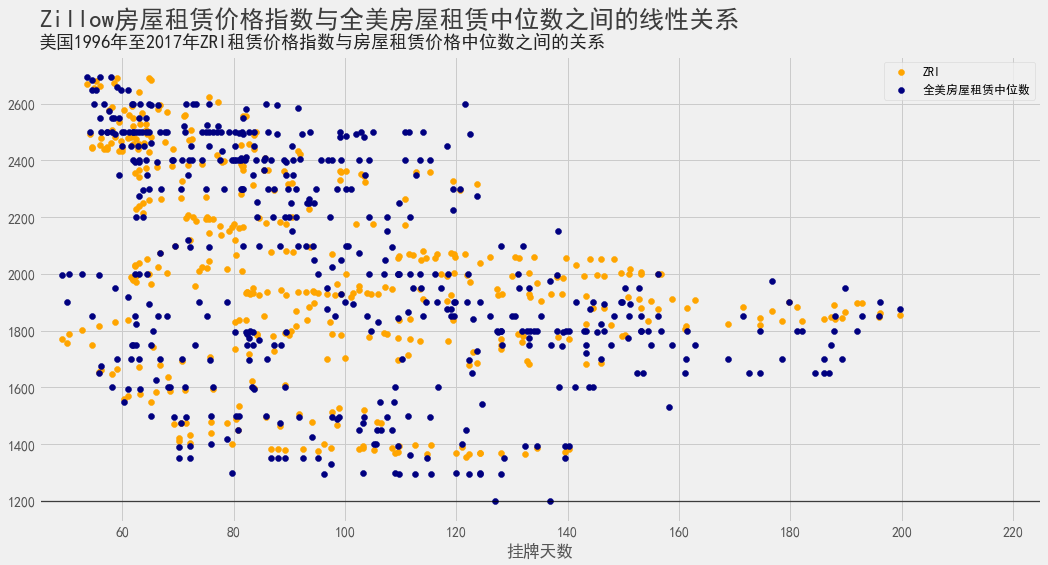

In [15]:
# 画出散点图：Zillow房屋租赁价格指数与全美房屋租赁中位数之间的线性关系
plt.figure(figsize=(16,8))
plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.ZRI_AllHomes,c="orange",label="ZRI")
plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.MedianRentalPrice_AllHomes,c="navy",label="全美房屋租赁中位数");

plt.axhline(y = 1200, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = 45, right = 225)
plt.legend(fontsize=12,loc='best',frameon=1,fancybox=1)
plt.xlabel('挂牌天数')
plt.text(x = 45, y = 2870, s = "Zillow房屋租赁价格指数与全美房屋租赁中位数之间的线性关系",fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 45, y = 2800,s = '美国1996年至2017年ZRI租赁价格指数与房屋租赁价格中位数之间的关系',fontsize = 18, alpha = .85)
plt.show()

#### 2.8 不同户型每平方英尺售价走势
* 本部分使用折线图展示了美国2010年至2017年不同户型房屋每平方英尺挂牌价格中位数的变化趋势

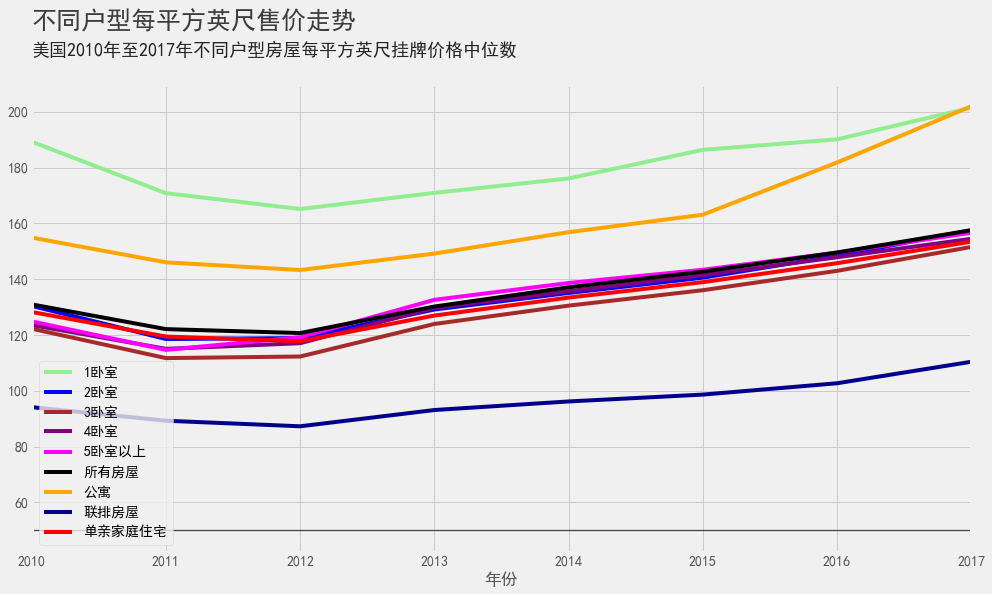

In [16]:
# 画出折线图：不同户型每平方英尺售价走势
plt.figure(figsize=(15,8))
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_1Bedroom'].mean().dropna().plot(linewidth=4,c='lightgreen', legend=False)
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_2Bedroom'].mean().dropna().plot(linewidth=4,c='b')
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_3Bedroom'].mean().dropna().plot(linewidth=4,c='brown')
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_4Bedroom'].mean().dropna().plot(linewidth=4,c='purple')
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_5BedroomOrMore'].mean().dropna().plot(linewidth=4,c='magenta')
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_AllHomes'].mean().dropna().plot(linewidth=4,c='black')
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_CondoCoop'].mean().dropna().plot(linewidth=4,c='orange',legend=False)
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_DuplexTriplex'].mean().dropna().plot(linewidth=4,c='darkblue',legend=False)
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_SingleFamilyResidence'].mean().dropna().plot(linewidth=4,c='red')
plt.legend(fontsize=12,frameon=1,fancybox=1,bbox_to_anchor=(0.02,1.35), ncol=2)
plt.legend(['1卧室','2卧室','3卧室','4卧室','5卧室以上','所有房屋','公寓','联排房屋','单亲家庭住宅'],loc='best')
plt.xlabel('年份')
plt.axhline(y = 50, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = 2010, right = 2017)
plt.text(x = 2010, y = 230, s = "不同户型每平方英尺售价走势",fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 2010, y = 220,s = '美国2010年至2017年不同户型房屋每平方英尺挂牌价格中位数',fontsize = 18, alpha = .85)
plt.show()

以上折线图展示了美国2010年至2017年不同户型房屋每平方英尺挂牌价格中位数的变化趋势，可以看到其中1卧室房屋、公寓是最热门的两种户型，其价格走势一直领先于其他户型的房屋，而在近期公寓的价格走势已经超越了1居室房屋，成为全美国最热门且昂贵的户型，而所有户型中价格最低的则是联排房屋，这可能是由于美国的住房文化决定的，联排房屋属于别墅的一种，而大部分别墅是建立在郊区，郊区的房价普遍比市区要低很多，其中联排别墅又是别墅中比较廉价的一种，故其价格是所有户型中最低的。根据2017年最新数据，最昂贵的公寓每平方英尺单价要比最便宜的联排房屋高82%。

#### 2.9 美国房价上涨与下跌比例的变化情况
* 本部分探索了美国1997年至2017年房价上涨与下跌比例变化情况

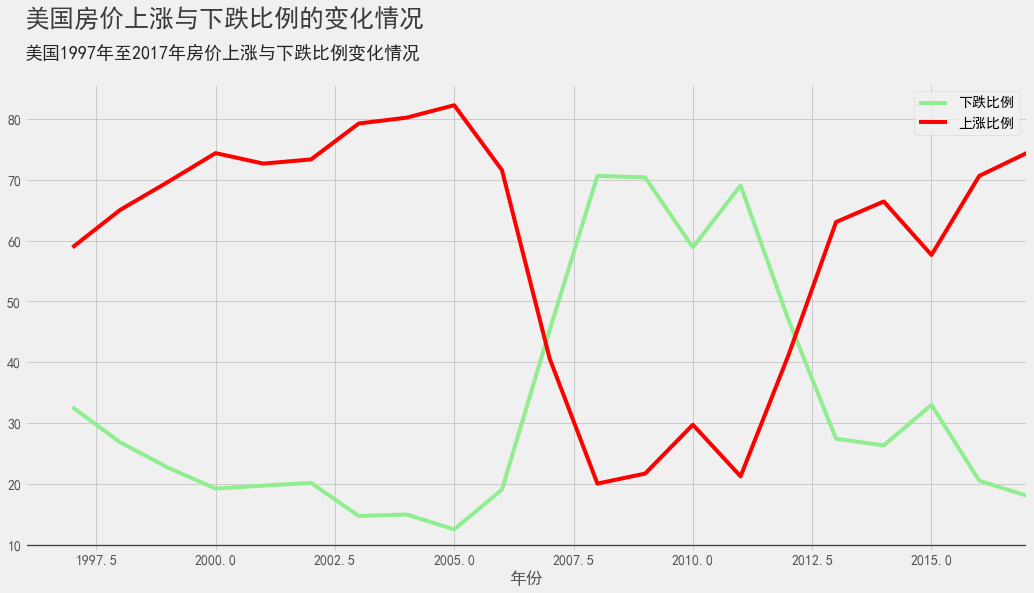

In [17]:
# 画出折线图：房价上涨与下跌比例的变化情况
plt.figure(figsize=(16,8))
State_time_series.groupby(State_time_series['year'])['PctOfHomesDecreasingInValues_AllHomes'].median().plot(linewidth=4,c='lightgreen',legend=False)
State_time_series.groupby(State_time_series['year'])['PctOfHomesIncreasingInValues_AllHomes'].median().plot(linewidth=4,c='r')
plt.axhline(y = 10, color = 'black', linewidth = 1.3, alpha = .7)
plt.legend(['下跌比例','上涨比例'],loc='best')
plt.xlabel('年份')
plt.xlim(left = 1996, right = 2017)
plt.text(x = 1996, y = 95, s = "美国房价上涨与下跌比例的变化情况",fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 1996, y = 90, s = '美国1997年至2017年房价上涨与下跌比例变化情况',fontsize = 18, alpha = .85)
plt.show()

从美国房价上涨与下跌比例的变化情况图可以看出自1997年-2015年在美国投资房产的大环境变化趋势，在金融危机之前，美国每年有60%以上的房屋价格是呈上涨趋势的，而每年仅有不到35%的房屋价格是下跌的，这一数字在2005年达到了最低点，2005年仅有不足15%的房屋价格处于下跌状态，而当年涨价的房屋高达80%，房地差泡沫破裂后，房价下跌的比例在2007年中旬达到了峰值，为70%，而当年上涨房屋的比例仅为20%，随后即引起了全球经济的大崩盘。有趣的是房地产市场也是先于经济复苏的，自2011年中旬即恢复了上涨趋势，比经济全面复苏早了6个月左右。

#### 2.10 美国2002年至2017年的房屋买卖损益分析
* 本部分以折线图探索了美国2002年至2017年的房屋买卖损益分析

Text(2001, 105, '美国2002年至2017年的房屋买卖损益百分比变化情况')

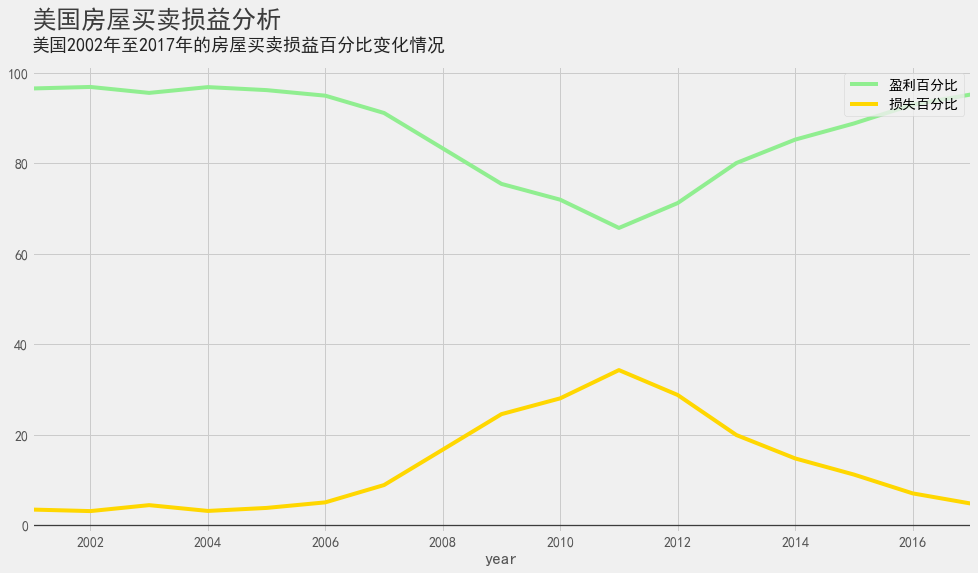

In [18]:
# 画出折线图：美国2002年至2017年的房屋买卖损益分析
plt.figure(figsize=(15,8));
State_time_series.groupby(State_time_series['year'])['PctOfHomesSellingForGain_AllHomes'].median().plot(linewidth=4,c='lightgreen', legend=False)
State_time_series.groupby(State_time_series['year'])['PctOfHomesSellingForLoss_AllHomes'].median().plot(linewidth=4,c='gold')
plt.legend(['盈利百分比','损失百分比'],loc='upper right')
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = 2001, right = 2017)
plt.text(x = 2001, y = 110, s = "美国房屋买卖损益分析",fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 2001, y = 105, s = '美国2002年至2017年的房屋买卖损益百分比变化情况', fontsize = 18, alpha = .85)

上面的美国房屋买卖损益分析图展示了2002年至2017年的房屋买卖损益百分比变化情况，也是比较直观地显示了投资美国房地产近15年的整体走势情况，与美国房价上涨与下跌比例的变化情况相一致，其中2008年金融危机开始后一直到2011年复苏之前，投资房地产的最大亏损达到了36%左右，后面用了6年左右的时间才恢复到前期历史水平。

#### 2.11 美国2010年至2017年不同户型房屋价格季节性调整
* 本部分以折线图展示了美国2010年至2017年不同户型房屋价格季节性调整：包括所有房屋、公寓、单亲家庭住宅三种最具代表性的户型

Text(2010, 13.7, '美国2010年至2017年不同户型房屋价格季节性调整')

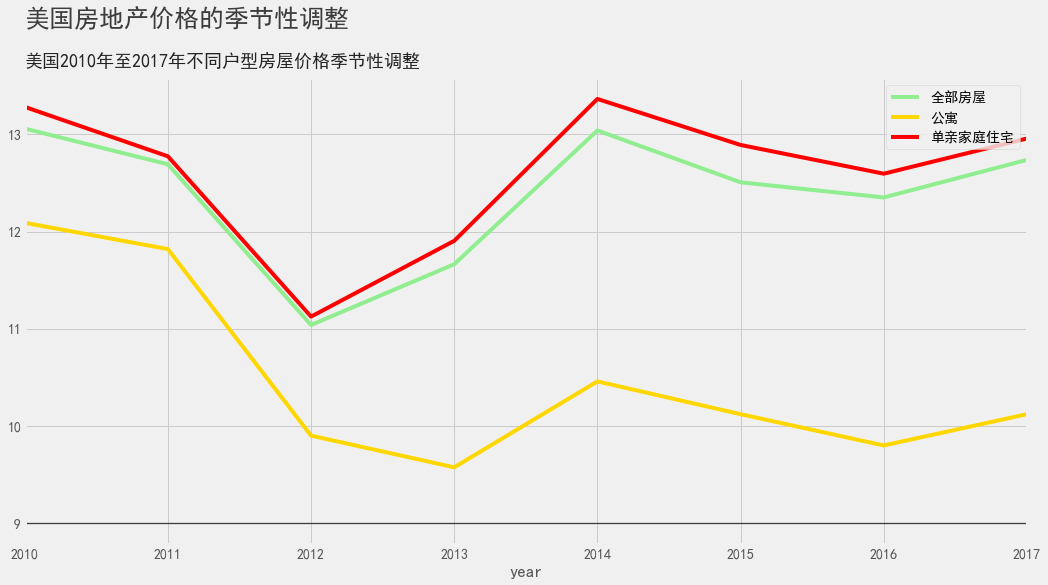

In [19]:
# 画出折线图：美国2010年至2017年不同户型房屋价格季节性调整
plt.figure(figsize=(16,8))
State_time_series.groupby(State_time_series['year'])['PctOfListingsWithPriceReductionsSeasAdj_AllHomes'].median().plot(linewidth=4,c='lightgreen', legend=False)
State_time_series.groupby(State_time_series['year'])['PctOfListingsWithPriceReductionsSeasAdj_CondoCoop'].median().plot(linewidth=4,c='gold')
State_time_series.groupby(State_time_series['year'])['PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence'].median().plot(linewidth=4,c='red')
plt.legend(['全部房屋','公寓','单亲家庭住宅'],loc='upper right')
plt.axhline(y = 9, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = 2010, right = 2017)
plt.text(x = 2010, y = 14.1, s = "美国房地产价格的季节性调整",fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 2010, y = 13.7, s = '美国2010年至2017年不同户型房屋价格季节性调整',fontsize = 18, alpha = .85)

上图展示了美国2010年至2017年不同户型房屋价格季节性调整情况，我们选取了三种比较具有代表性的不同房屋，分别为全部房屋（代表市场平均水平）、公寓、单亲家庭住宅，可以看到这三类房屋在一个大的房地产周期内价格变动情况，其中公寓的调整幅度是最小的，因为公寓一般处于美国较发达的城市中心，即使遭受了经济危机的重创，生活在城市中的人们对于其需求也不会发生较大的变化，所以公寓的价格水平不会有很大的波动。单亲家庭的价格水平则是变化幅度最大的，尤其是受到金融危机影响时，由于单亲家庭的经济来源较为单一，容易收到经济周期的影响，这类人群会选择不同地点购置或租赁房产，从而导致单亲家庭住宅价格水平的季节性变化较大。

#### 2.12 美国各州2010年至2017年的不同户型房屋租赁价格中位数的变化
* 本部分以折线图展示了美国各州2010年至2017年的不同户型房屋租赁价格中位数的变化

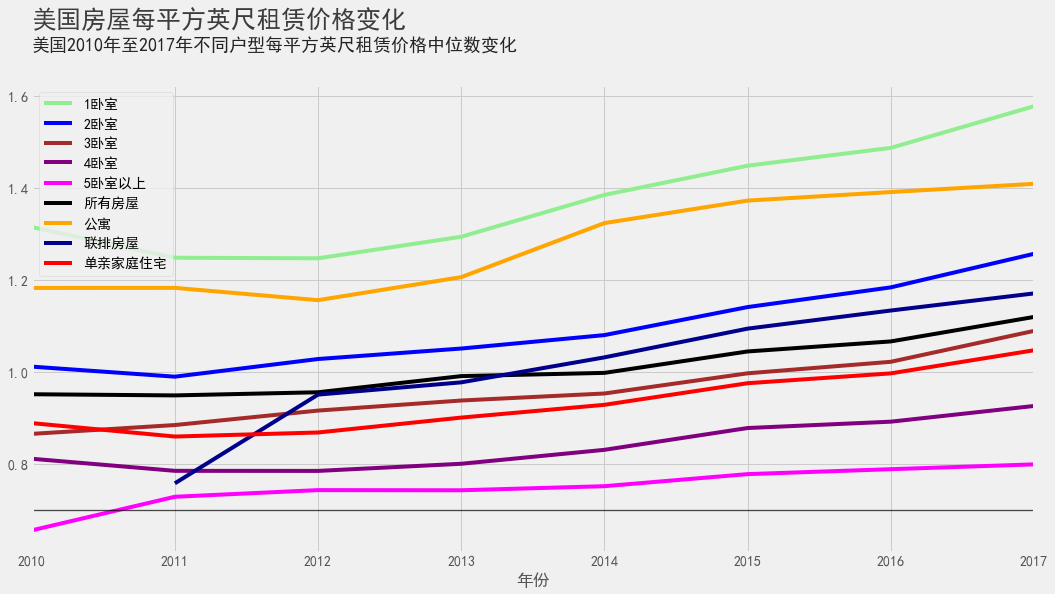

In [20]:
# 画出折线图：美国各州2010年至2017年的不同户型房屋租赁价格中位数的变化
plt.figure(figsize=(16,8))
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_1Bedroom'].mean().dropna().plot(linewidth=4,c='lightgreen', legend=False)
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_2Bedroom'].mean().dropna().plot(linewidth=4,c='b')
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_3Bedroom'].mean().dropna().plot(linewidth=4,c='brown')
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_4Bedroom'].mean().dropna().plot(linewidth=4,c='purple')
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_5BedroomOrMore'].mean().dropna().plot(linewidth=4,c='magenta')
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_AllHomes'].mean().dropna().plot(linewidth=4,c='black')
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_CondoCoop'].mean().dropna().plot(linewidth=4,c='orange',legend=False)
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_DuplexTriplex'].mean().dropna().plot(linewidth=4,c='darkblue',legend=False)
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_SingleFamilyResidence'].mean().dropna().plot(linewidth=4,c='red')
plt.legend(fontsize=12,bbox_to_anchor=(0.02,1.35), ncol=2)
plt.legend(['1卧室','2卧室','3卧室','4卧室','5卧室以上','所有房屋','公寓','联排房屋','单亲家庭住宅'],loc='upper left')
plt.xlabel('年份')
plt.axhline(y = 0.7, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = 2010, right = 2017)
plt.text(x = 2010, y = 1.75, s = "美国房屋每平方英尺租赁价格变化",fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 2010, y = 1.7, s = '美国2010年至2017年不同户型每平方英尺租赁价格中位数变化',fontsize = 18, alpha = .85);

从上面美国房屋每平方英尺租赁价格变化图中可以清晰地看到2010年至2017年不同户型每平方英尺租赁价格中位数变化趋势，租赁价格与出售价格既有相似之处也有不同之处，相似之处是1卧室和公寓这两种户型依然是所有户型的房屋里最昂贵的两种，而1居室房屋一直没有被公寓的租金所超越，而租金单价最便宜的居然是5居室，这似乎与违反了常理，按人们正常的理解，卧室数量越多的房屋无论是售价还是租金都应该是最昂贵的，但是我们需要注意这里考虑的是每平方英尺的价格，因为5居室的房屋面积非常大，即使整套的租赁价格很昂贵，平均到每平方英尺的价格就便宜了很多，如果5居室的租赁单价与1居室相同的话，那么整体租赁价格将会过于昂贵，超出了人们所能接受的范围。还有一点值得注意的是，联排房屋的租金在2011至2012年间有一个较大的提升，而且其综合排名一直在4名左右，这也是符合美国房地产租赁市场的现状，即许多生活在郊区的人们并不会选择自己购置房产，而是租赁联排房屋，所以其租赁价格并非如售价一样排名最后。

#### 2.13 金融危机过后美国五大州的房屋销售价格增长的时间序列
* 本部分以折线图展示了2009年之后美国主要五大州的房屋销售价格增长的时间序列，其中统计频率分别为：日频、月频、季频、年频

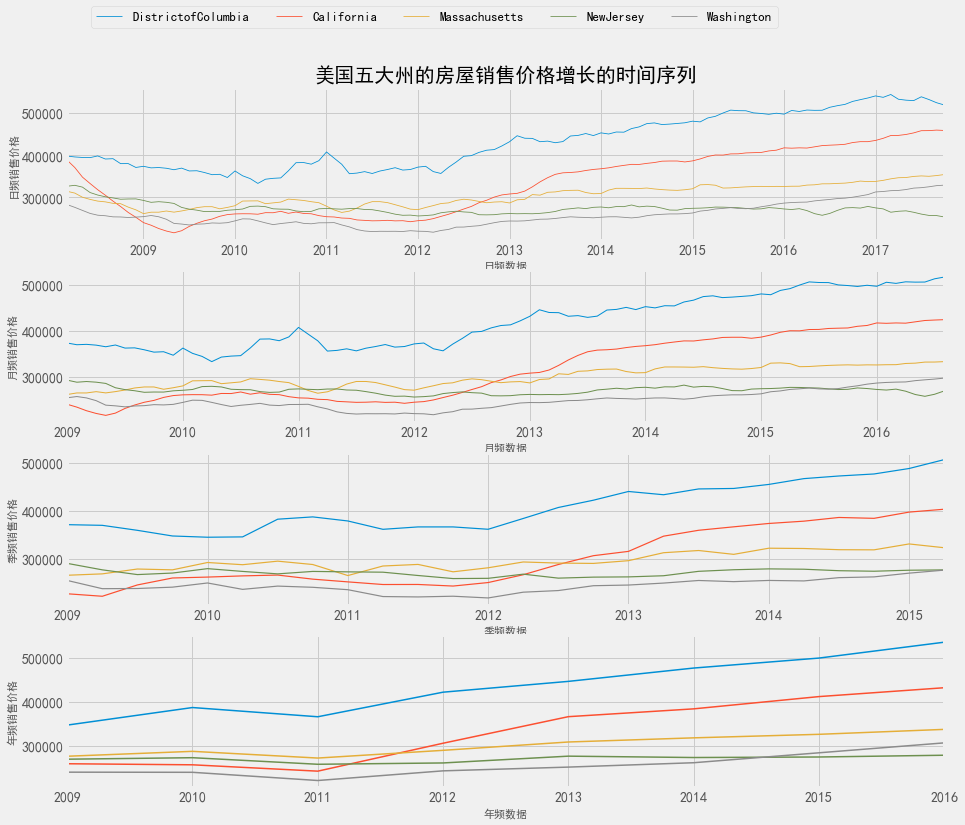

In [21]:
# 画出折线图：美国主要州的房屋销售价格增长的时间序列
States_year_SalePrices=State_time_series_year.groupby([State_time_series_year.Date,State_time_series_year.RegionName])['Sale_Prices'].mean().dropna().reset_index(name='Sale_Prices')
PriceDF=States_year_SalePrices.pivot(index='Date', columns='RegionName', values='Sale_Prices').dropna()
t0 = PriceDF.index
t1 = pd.date_range(pd.to_datetime('30/01/2009'),pd.to_datetime('2017-08-31'),freq='A')
t2 = pd.date_range(pd.to_datetime('30/01/2009',dayfirst=True),pd.to_datetime('2016-08-31' ,dayfirst=True),freq='M')
t3 = pd.date_range(pd.to_datetime('30/01/2009',dayfirst=True),pd.to_datetime('2015-08-31',dayfirst=True),freq='Q')

fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(14,12))
ax[0].set_title("美国五大州的房屋销售价格增长的时间序列")

PriceDF.reindex(index=t0,columns=highest_cost_states).plot(ax=ax[0], lw=0.8, legend=False)
ax[0].set_ylabel('日频销售价格', fontsize=11)
ax[0].set_xlabel('日频数据', fontsize=11)

PriceDF.reindex(index=t2,columns=highest_cost_states).plot(ax=ax[1], lw=1.0, legend=False)
ax[1].set_ylabel('月频销售价格', fontsize=11)
ax[1].set_xlabel('月频数据', fontsize=11)

PriceDF.reindex(index=t3,columns=highest_cost_states).plot(ax=ax[2], lw=1.2, legend=False)
ax[2].set_ylabel('季频销售价格', fontsize=11)
ax[2].set_xlabel('季频数据', fontsize=11)

PriceDF.reindex(index=t1,columns=highest_cost_states).plot(ax=ax[3], lw=1.5, legend=False)
ax[3].set_ylabel('年频销售价格', fontsize=11)
ax[3].set_xlabel('年频数据', fontsize=11)

ax[0].legend(loc='lower left',fontsize=13, bbox_to_anchor=(0.02,1.35), ncol=len(highest_cost_states))
plt.show()

上图是2008年金融危机之后美国五大州的房屋销售价格增长的时间序列，其中我们分别按照日频、月频、季频、年频的数据频率进行了统计，可以看到随着时间跨度的增长，价格曲线越来越平滑。这里我们选取了房价最高的五个州，分别是哥伦比亚特区、加利福尼亚州、马萨诸塞州、新泽西州、华盛顿，与文章中本部分最开始统计的五大洲的房屋销售价格增长趋势相对应，其中哥伦比亚特区的房价一直领先，而金融危机前一直领先的加利福尼亚州先是遭到了重创，知道2011年之后才开始重新恢复上涨态势，并在2013年重新恢复到全国排名第二的位置。从本数据集中也可以侧面看出，哥伦比亚特区的房子一直没有遭到过度投机性的炒作，所以即使是金融危机也没有使其房价有较大的跌幅，从整体来看，哥伦比亚特区的房价自2009年至2016年的复合涨幅达到了4.27%，与美国极低的银行利率相比，是非常稳健且健康的投资标的。

### 第三部分 建立模型

由于在上述分析中大多为时间序列数据，为了建模便利，我们在本部分选取Zillow经济数据库中最热门的加利福尼亚州的房价数据集，其中包含了10个数据维度。

#### 3.1 数据导入与纵览
* 数据集：California_Housing_Prices.csv

In [22]:
# 导入数据
df = pd.read_csv('./Zillow Data/California_Housing_Prices.csv')
# 数据速览
print('数据行数：'+str(df.shape[0]))
print('数据列数：'+str(df.shape[1]))
print('数据特征：', df.columns.values)
print('描述性统计：\n')
df.describe()

数据行数：20640
数据列数：10
数据特征： ['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'
 'median_house_value' 'ocean_proximity']
描述性统计：



longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [23]:
# 数据速览
df.head(n=10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

In [24]:
# 查看缺失值
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

可以看到加州房价数据集中只有total_bedrooms列存在207个缺失数据，我们这里使用中位数median来填充缺失值。

In [25]:
def calc_categorical_median(x):
    # 根据ocean_proximity分类，使用中位数填补缺失值
    unique_colums_ocean_proximity=x['ocean_proximity'].unique()
    for i in unique_colums_ocean_proximity:
        median=x[x['ocean_proximity']==i]['total_bedrooms'].median()
        x.loc[x['ocean_proximity']==i,'total_bedrooms'] =  x[x['ocean_proximity']==i]['total_bedrooms'].fillna(median)
calc_categorical_median(df)
# 再次查看缺失值，发现全部已填充完毕
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

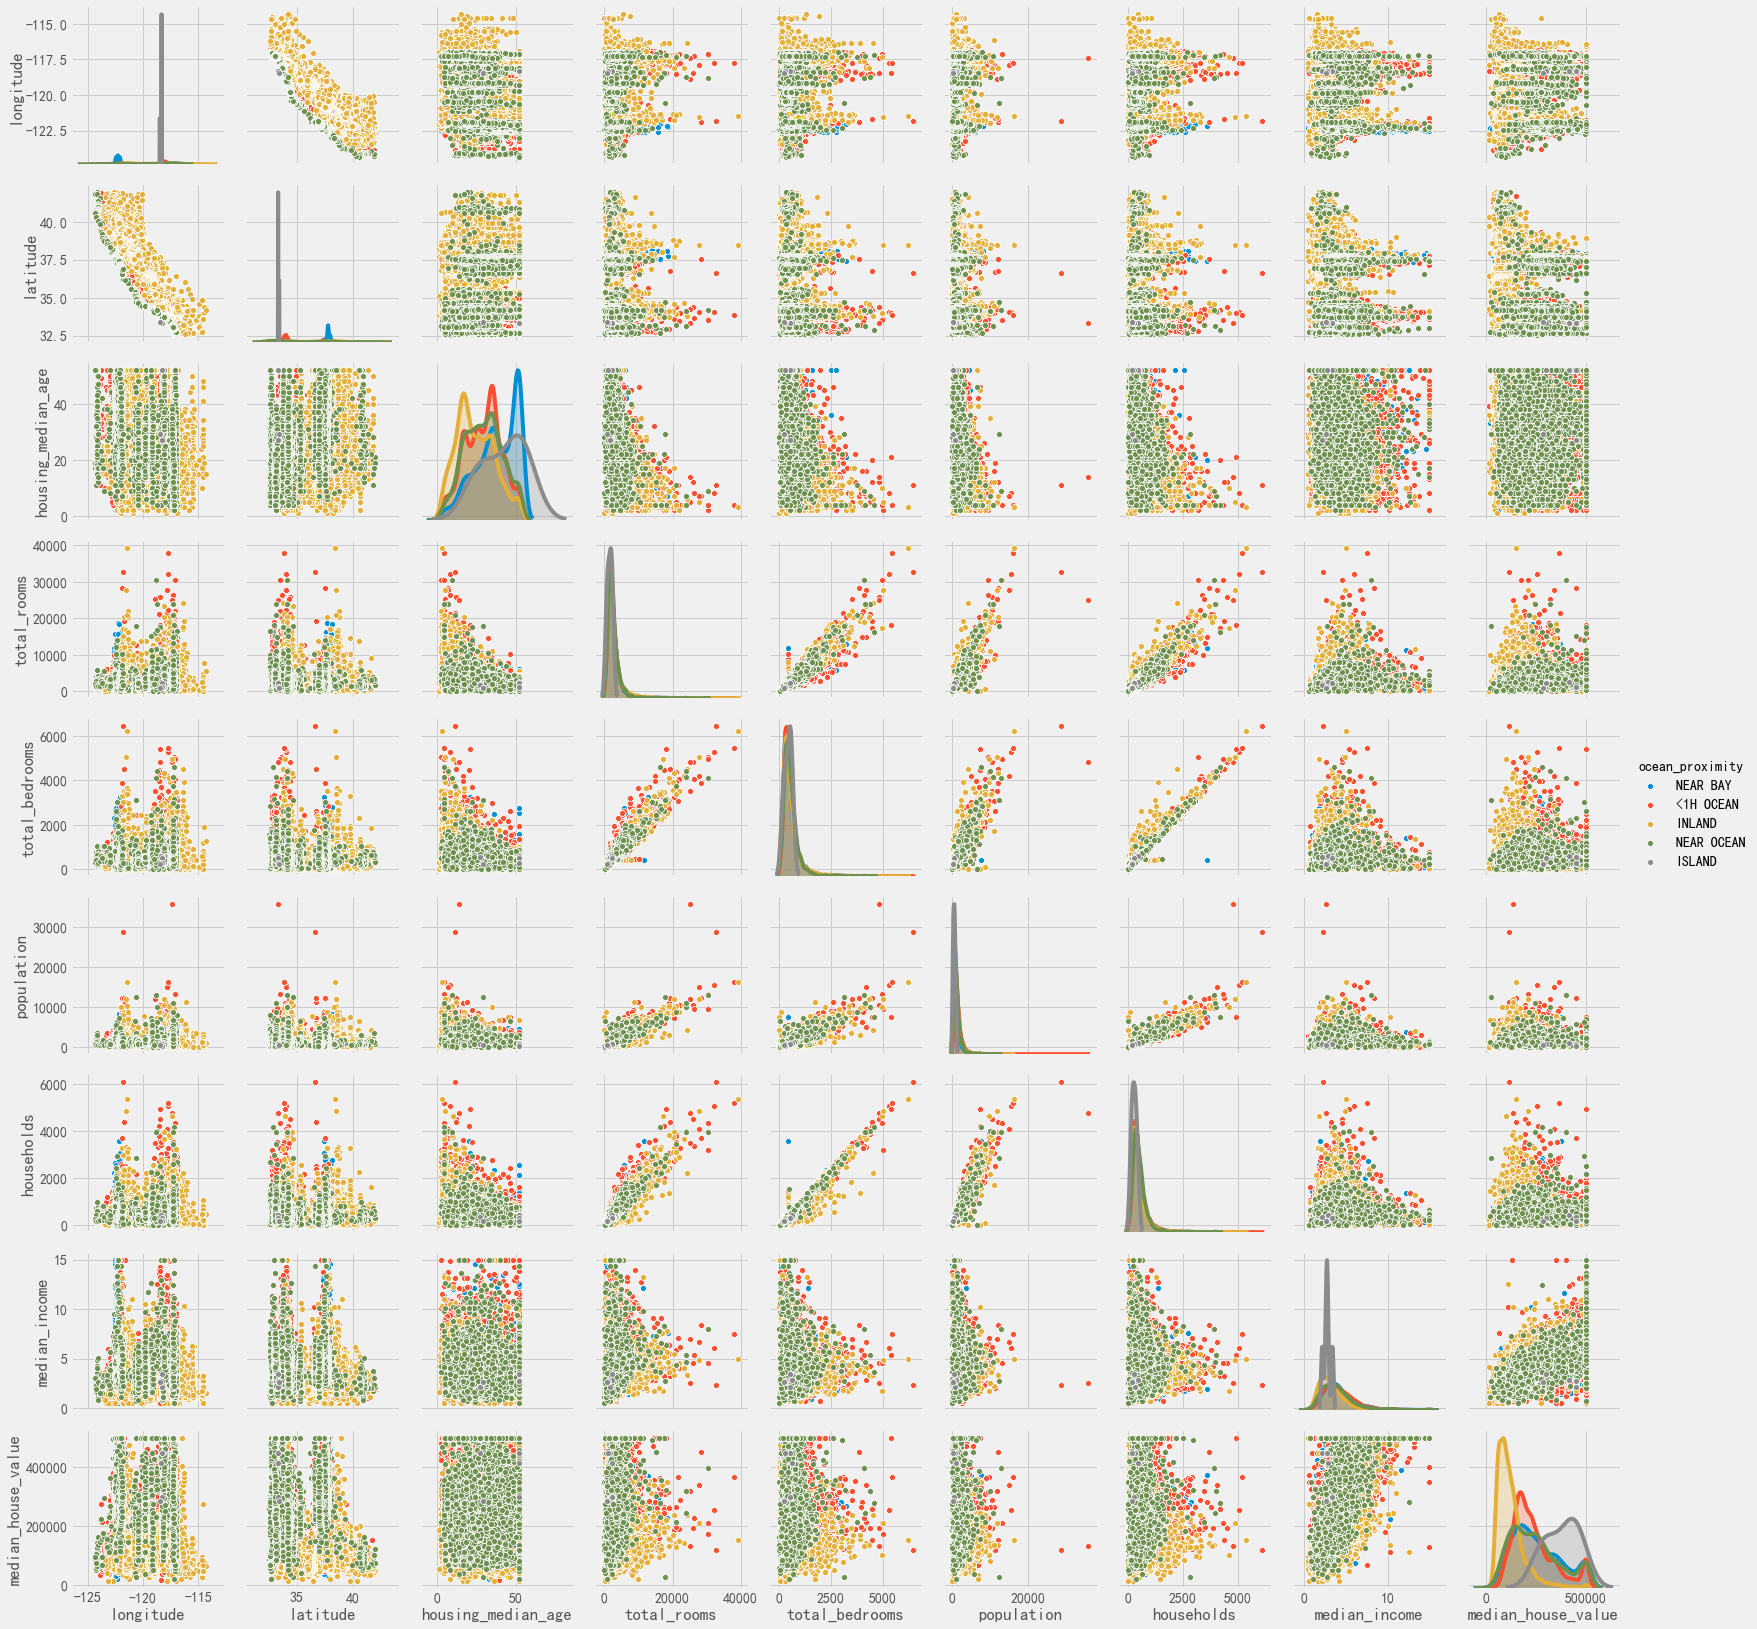

In [26]:
# 查看完整数据集的特征分布直方图
sns.pairplot(df,hue="ocean_proximity")

由于我们建模的因变量是median_house_value，所以需要保证这部分数据不会有很大的“偏移性”，通过上述的直方图中可以看出，在岛屿（Island）上的房屋价值偏高，而且大部分集中在50万美金的区域，所以我们需要将大于50万美金部分的数据移除。

In [27]:
df = df[(df['median_house_value']<=500000) & (df['population']<25000)]
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[19673 rows x 10 columns]

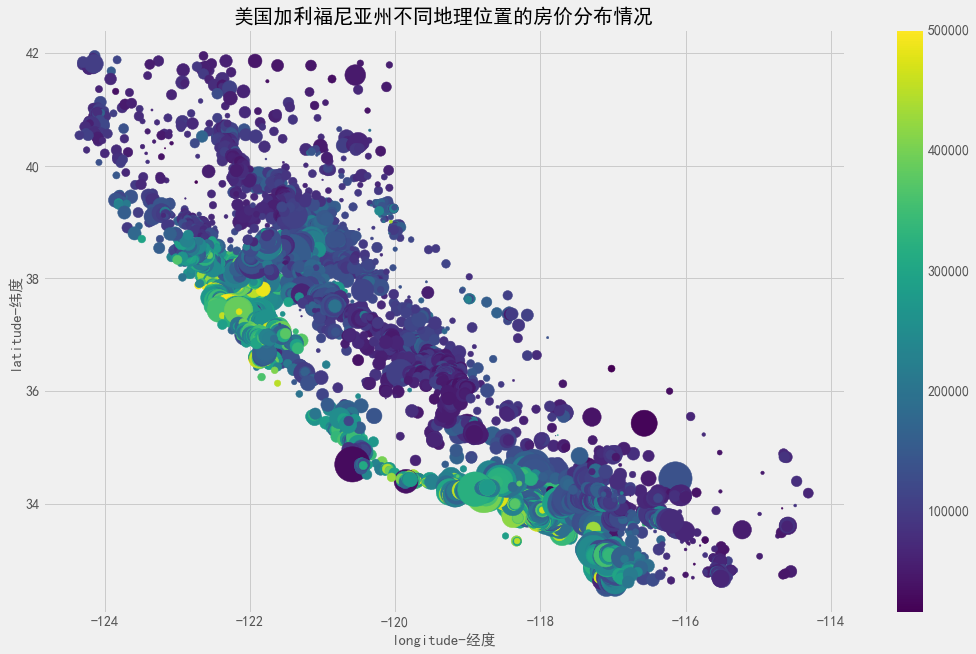

In [28]:
# 查看美国加利福尼亚州不同地理位置的房价分布情况
plt.figure(figsize=(16,10))
plt.scatter(df['longitude'],df['latitude'],c=df['median_house_value'],s=df['population']/10,cmap='viridis')
plt.colorbar()
plt.xlabel('longitude-经度',fontsize=15)
plt.ylabel('latitude-纬度',fontsize=15)
plt.title('美国加利福尼亚州不同地理位置的房价分布情况',fontsize=20)
plt.show()

从上图中可以清晰地看出美国加州大部分高端奢侈住宅都分布在经度-124至-121、纬度36至38以及经度-120至-117、纬度33至35这两大地区，而这两大地区分为别有“人间天堂、度假胜地”之称的旧金山和洛杉矶。

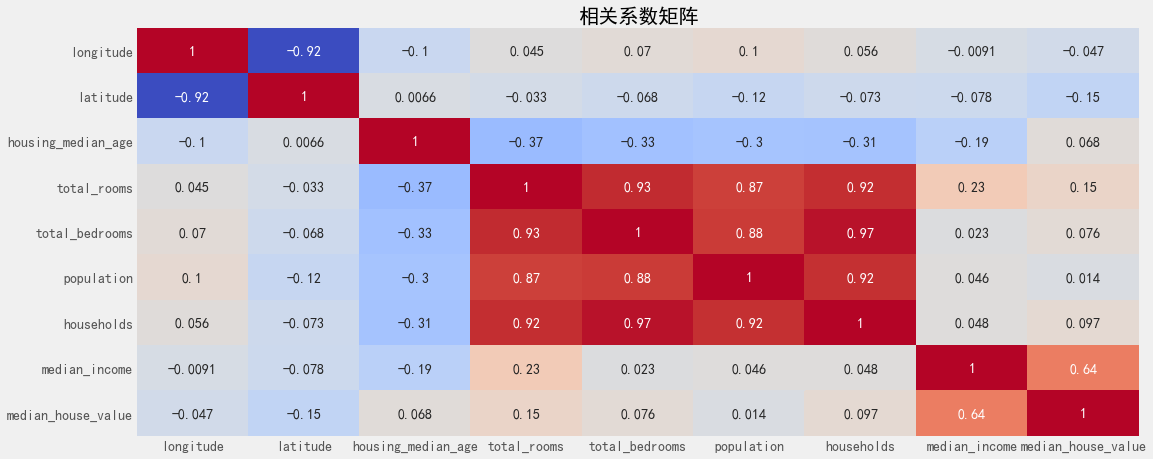

In [29]:
# 查看变量之间的相关系数矩阵
plt.figure(figsize=(16,7))
sns.heatmap(cbar=False,annot=True,data=df.corr(),cmap='coolwarm',)
plt.title('相关系数矩阵')
plt.show()

#### 3.2 数据预处理
1. 特征选择：Feature Selection
2. 数据划分：Tranning and Testing sampling
3. 数据归一化：Normalising data
4. 数据降维：Feature Dimentional Reduction and Visualization
   1. 使用PCA技术降维并可视化：Visualising data using PCA
   2. 使用K-means方法进行聚类：Clustering with K-means

* 特征选择：Feature Selection

In [30]:
# 特征选择：将ocean_proximity转换为one-hot编码式变量
df = pd.concat([pd.get_dummies(df['ocean_proximity'],drop_first=True),df],axis=1).drop('ocean_proximity',axis=1)
df['income per working population']=df['median_income']/(df['population']-df['households'])
df['bed per house']=df['total_bedrooms']/df['total_rooms']
df['h/p']=df['households']/df['population']

# 将房屋年龄（housing_median_age）变为分类变量
def type_building(x):
    if x<=10:
        return "new"
    elif x<=30:
        return 'mid old'
    else:
        return 'old'
df = pd.concat([df,pd.get_dummies(df['housing_median_age'].apply(type_building),drop_first=True)],axis=1)
x = df.drop('median_house_value',axis=1).values
y = df['median_house_value'].values
df

INLAND  ISLAND  NEAR BAY  NEAR OCEAN  longitude  latitude  \
0           0       0         1           0    -122.23     37.88   
1           0       0         1           0    -122.22     37.86   
2           0       0         1           0    -122.24     37.85   
3           0       0         1           0    -122.25     37.85   
4           0       0         1           0    -122.25     37.85   
...       ...     ...       ...         ...        ...       ...   
20635       1       0         0           0    -121.09     39.48   
20636       1       0         0           0    -121.21     39.49   
20637       1       0         0           0    -121.22     39.43   
20638       1       0         0           0    -121.32     39.43   
20639       1       0         0           0    -121.24     39.37   

       housing_median_age  total_rooms  total_bedrooms  population  \
0                    41.0        880.0           129.0       322.0   
1                    21.0       7099.0          1106.0      2401.0   
2                    52.0       1467.0           190.0       496.0   
3                    52.0       1274.0           235.0       558.0   
4                    52.0       1627.0           280.0       565.0   
...                   ...          ...             ...         ...   
20635                25.0       1665.0           374.0       845.0   
20636                18.0        697.0           150.0       356.0   
20637                17.0       2254.0           485.0      1007.0   
20638                18.0       1860.0           409.0       741.0   
20639                16.0       2785.0           616.0      1387.0   

       households  median_income  median_house_value  \
0           126.0         8.3252            452600.0   
1          1138.0         8.3014            358500.0   
2           177.0         7.2574            352100.0   
3           219.0         5.6431            341300.0   
4           259.0         3.8462            342200.0   
...           ...            ...                 ...   
20635       330.0         1.5603             78100.0   
20636       114.0         2.5568             77100.0   
20637       433.0         1.7000             92300.0   
20638       349.0         1.8672             84700.0   
20639       530.0         2.3886             89400.0   

       income per working population  bed per house       h/p  new  old  
0                           0.042476       0.146591  0.391304    0    1  
1                           0.006573       0.155797  0.473969    0    0  
2                           0.022750       0.129516  0.356855    0    1  
3                           0.016646       0.184458  0.392473    0    1  
4                           0.012569       0.172096  0.458407    0    1  
...                              ...            ...       ...  ...  ...  
20635                       0.003030       0.224625  0.390533    0    0  
20636                       0.010565       0.215208  0.320225    0    0  
20637                       0.002962       0.215173  0.429990    0    0  
20638                       0.004763       0.219892  0.470985    0    0  
20639                       0.002787       0.221185  0.382120    0    0  

[19673 rows x 18 columns]

* 数据划分：Tranning and Testing sampling（70%训练集、30%测试集）

In [31]:
# 数据划分：Tranning and Testing sampling（70%训练集、30%测试集）
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

* 数据归一化：Normalising data

In [35]:
# 数据归一化：Normalising data
ms = MinMaxScaler()
xtrain = ms.fit_transform(xtrain)
xtest = ms.transform(xtest)

* 数据降维：Feature Dimentional Reduction and Visualization

Text(0.5, 1.0, 'PCA特征数量与累计方差贡献率')

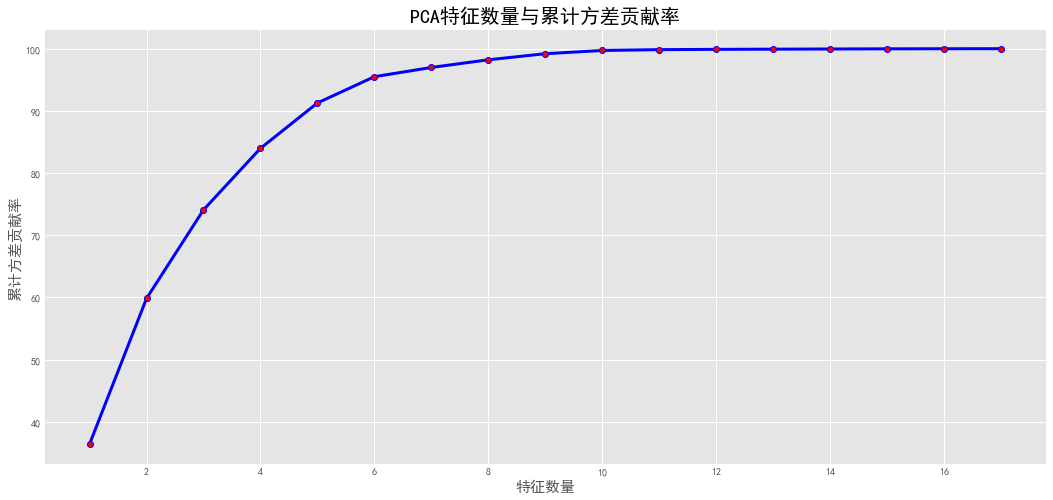

In [36]:
# 使用PCA技术降维并可视化：Visualising data using PCA
def c_variance(x):
    total=0
    clist=[]
    for i in np.arange(0,xtrain.shape[1]):
        p=PCA(n_components=i+1)
        p.fit(x)
        total=total+p.explained_variance_ratio_[i]
        clist.append(total)
    return clist
x_train_variance=list(map(lambda x:x*100,c_variance(xtrain)))

plt.figure(figsize=(16,8))
plt.plot(np.arange(1,xtrain.shape[1]+1),x_train_variance,color='b',marker='o',markerfacecolor='r',lw=3)
plt.xlabel('特征数量',fontsize=15)
plt.ylabel('累计方差贡献率',fontsize=15)
plt.title('PCA特征数量与累计方差贡献率',fontsize=20)

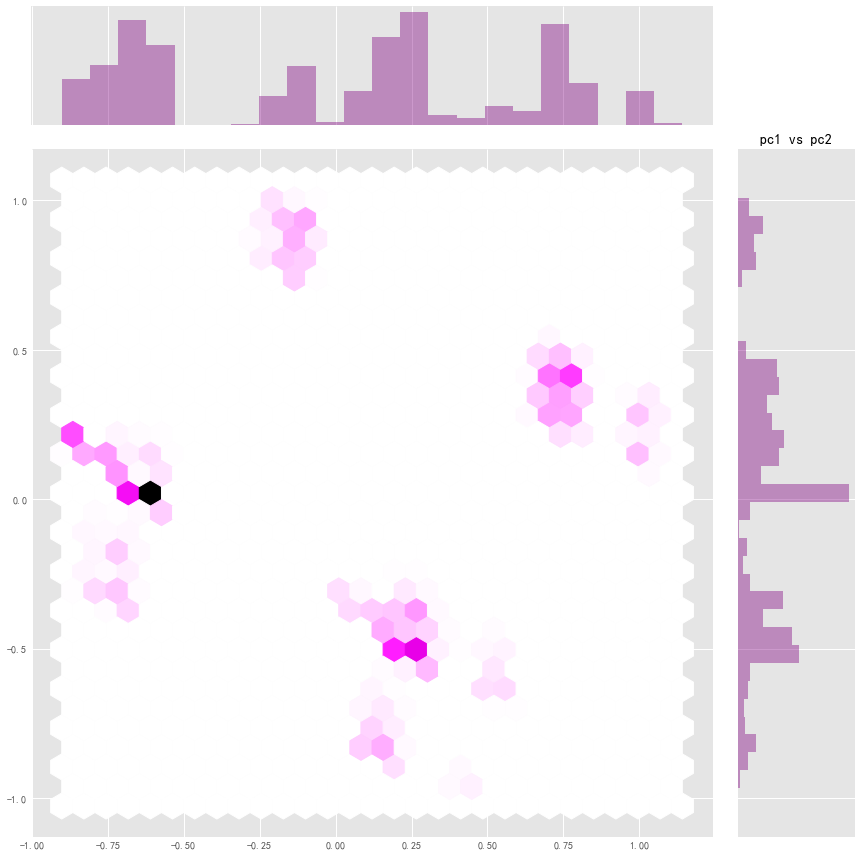

In [37]:
pca=PCA(n_components=2)
pca.fit(xtrain)
sns.jointplot(data={'pc1':pca.fit_transform(xtrain)[:,0],'pc2':pca.fit_transform(xtrain)[:,1]},x='pc1',y='pc2',size=12,kind='hex',color='purple')
plt.title('pc1 vs pc2')
plt.show()

从上图中可以看到前两个主成分已经提供了60%的方差贡献率。

* 使用K-means方法进行聚类：Clustering with K-means

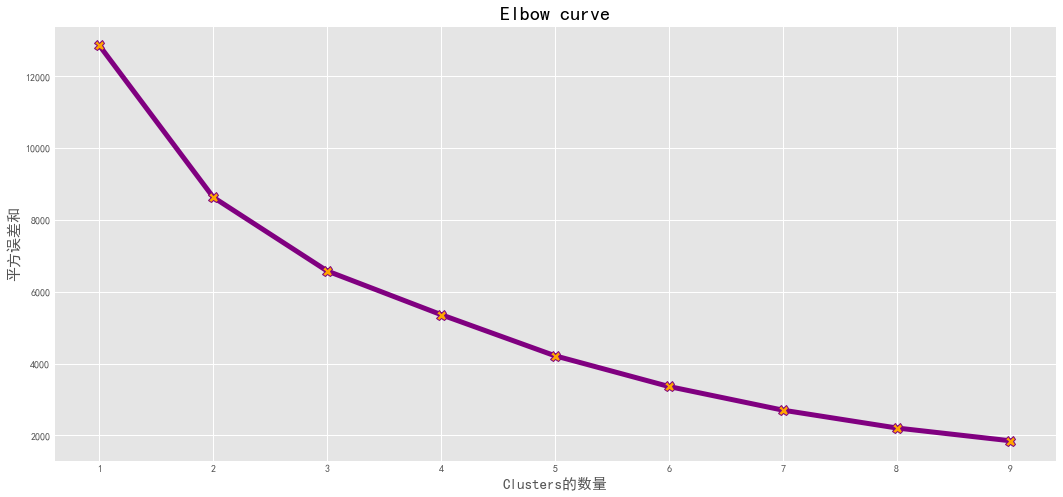

In [38]:
# 使用K-means方法对前两个主成分进行聚类
p_train=pca.fit_transform(xtrain)
best=[]
for i in range(1,10):
    k=KMeans(n_clusters=i)
    k.fit(xtrain)
    best.append(k.inertia_)
    
# 画出Elbow curve图
plt.figure(figsize=(16,8))
plt.plot(np.arange(1,len(best)+1),best,marker='X',markerfacecolor='orange',markersize=10,lw=5,color='purple')
plt.title('Elbow curve',fontsize=20)
plt.xlabel('Clusters的数量',fontsize=15)
plt.ylabel('平方误差和',fontsize=15)
plt.show()

可以看到聚类的最佳数量值是3。

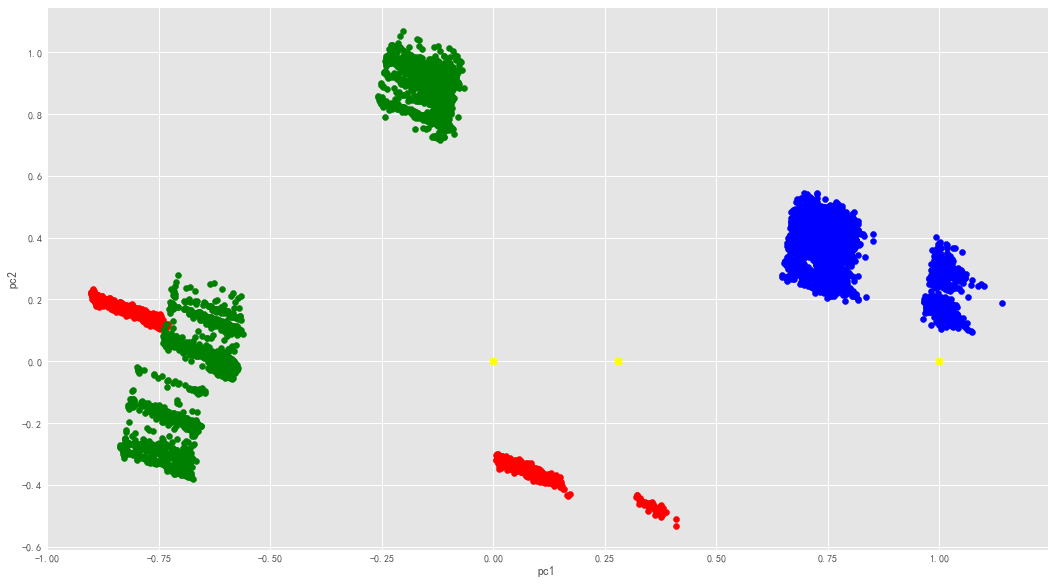

In [39]:
k = KMeans(n_clusters=4)
kpred=k.fit_predict(xtrain)
plt.figure(figsize=(16,10))
color=['red','green','blue','pink']
for i in range(3):
    plt.scatter(p_train[kpred==i][:,0],p_train[kpred==i][:,1],c=color[i])
    plt.scatter(k.cluster_centers_[i,0],k.cluster_centers_[i,1],c='yellow',marker='x')
    plt.xlabel('pc1')
    plt.ylabel('pc2')

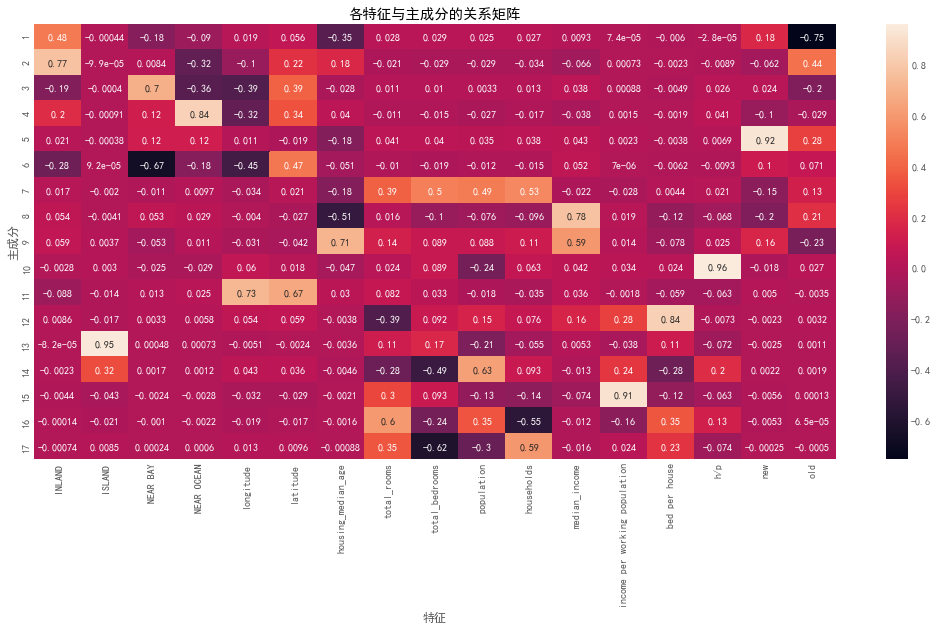

In [40]:
# 画出特征与主成分的关系矩阵图
pca=PCA(n_components=None)
pca.fit(xtrain)
plt.figure(figsize=(16,8))
sns.heatmap(pca.components_,annot=True,xticklabels=df.drop('median_house_value',axis=1).columns,yticklabels=[str(i) for i in range(1,len(df.columns))])
plt.xlabel('特征')
plt.ylabel('主成分')
plt.title('各特征与主成分的关系矩阵')
plt.show()
matplotlib.rcParams.update({'font.size': 12})

#### 3.3 建立模型
1. 线性回归模型：Linear Regression Model
2. 多项式回归模型：Polynomial regression Model
3. Lasso回归模型：Lasso Regression Model
4. 弹性网回归模型：Elastic Nets Regression Model
5. 岭回归模型：Ridge Regression Model
6. 决策树模型：Decision Trees Model
7. 随机森林模型：Random Forest Model

In [41]:
# 定义回归模型函数
def regresssor_model(x,y,estimator):
    regressor=estimator()
    regressor.fit(x,y)
    lr_rmse=np.sqrt(mean_squared_error(y,regressor.predict(x)))
    cv_regressor=cross_val_score(cv=10,X=x,y=y,estimator=regressor,scoring='r2')
    print('交叉验证准确率：'+ str(100*cv_regressor.mean()))
    print('交叉验证的方差：'+ str(100*cv_regressor.std()))
    return regressor

# 定义回归系数画图函数
def coeff_graph(regressor,regressor_name):
    plt.figure(figsize=(16,5))
    plt.bar(np.arange(len(regressor.coef_)),regressor.coef_,color='blue')
    plt.xlabel('回归系数')
    plt.ylabel('回归系数的数值')
    plt.title('{}-回归系数图'.format(regressor_name))

# 定义模型评估函数
def evaluate(ypred,ytest,regressor,regressor_name):
    '''残差分布直方图'''
    plt.figure(figsize=(16,5))
    plt.xlabel('真实值-预测值')
    plt.ylabel('频率')
    plt.title('{}-残差图'.format(regressor_name))
    plt.hist(ytest-ypred)
    '''RMSE结果'''
    print("{}-RMSE:".format(regressor_name) + str(np.sqrt(mean_squared_error(ytest,ypred))))
    plt.show()

# 定义多项式回归模型函数
def to_poly(degree,xtrain,xtest):
    poly=PolynomialFeatures(degree=degree)
    X=poly.fit_transform(xtrain)
    x=poly.fit_transform(xtest)
    return (X,x)

* 3.3.1 线性回归模型：Linear Regression Model（仅用Median Income一个自变量 vs 使用全部变量）
* 3.3.2 多项式回归模型：Polynomial regression Model（仅用Median Income一个自变量 vs 使用全部变量）
* 3.3.3 Lasso回归模型：Lasso Regression Model
* 3.3.4 弹性网回归模型：Elastic Nets Regression Model
* 3.3.5 岭回归模型：Ridge Regression Model

Linear regression Model：仅用Median Income一个自变量
交叉验证准确率：41.3506511798424
交叉验证的方差：1.9235500099556033
Linear Regression-RMSE:76318.44298565741


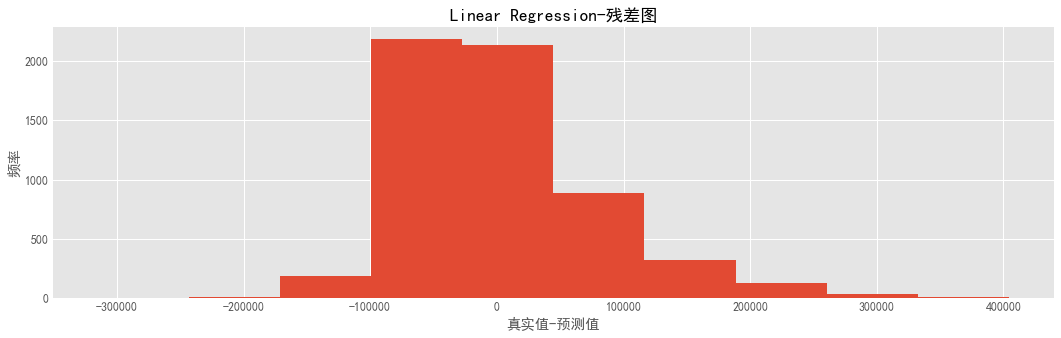

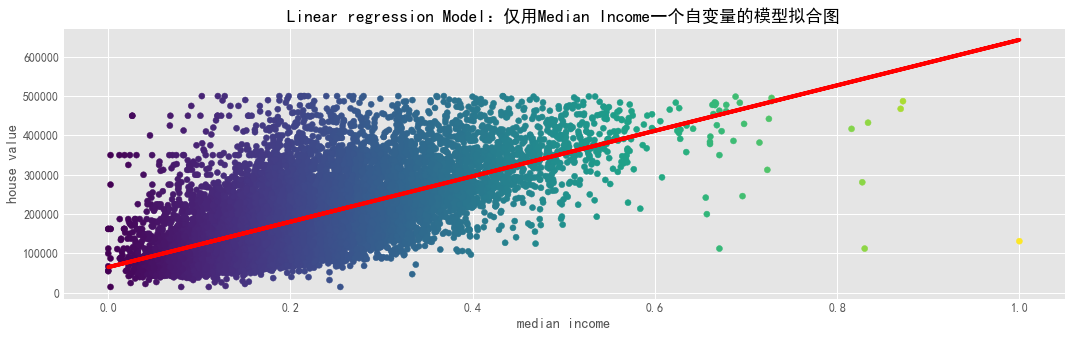

Linear regression Model：使用所有特征
交叉验证准确率：63.275904340783654
交叉验证的方差：1.8152421769594154
Linear Regression-RMSE:58680.28133084016


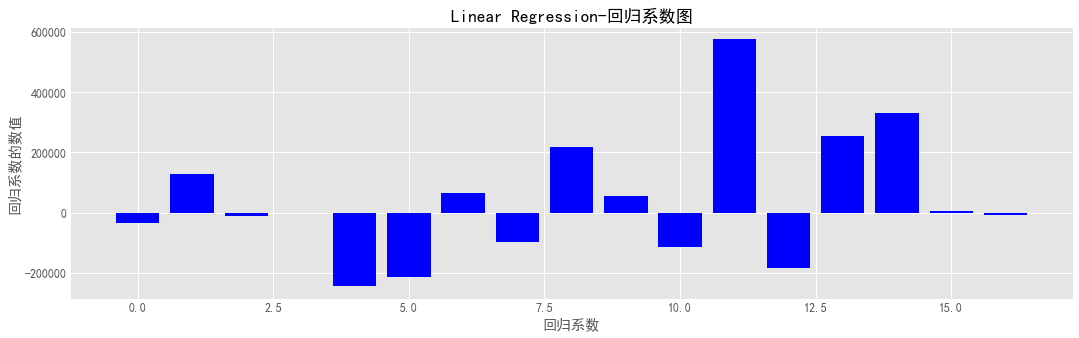

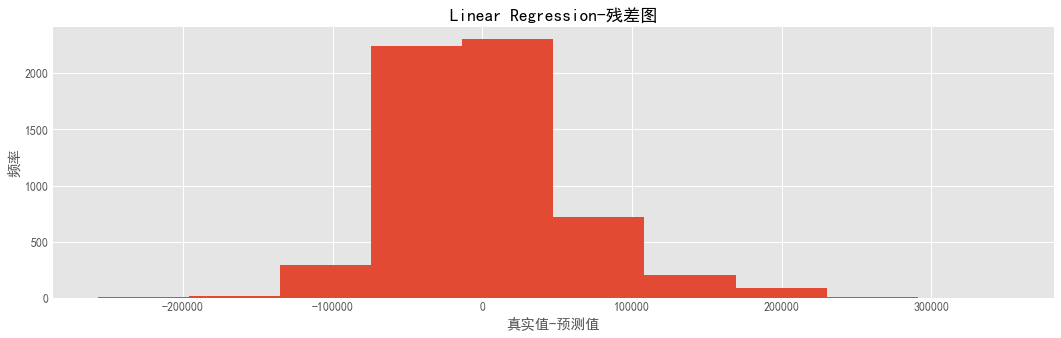

Polynomial regression Model:仅用Median Income一个自变量
交叉验证准确率：41.35096135301548
交叉验证的方差：1.8965677094607423
Polynomial Regression-RMSE:76253.76750278792


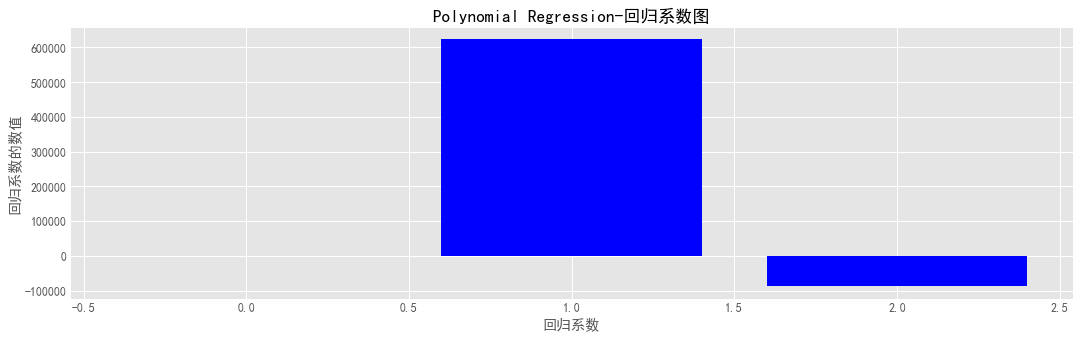

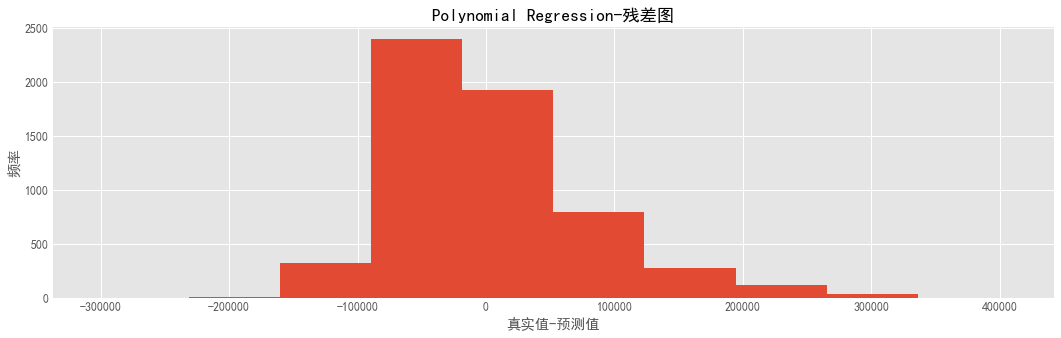

Polynomial regression Model:使用所有特征
交叉验证准确率：-1.1871174120461946e+21
交叉验证的方差：3.561282144480787e+21
Polynomial Regression-RMSE:25516240115247.438


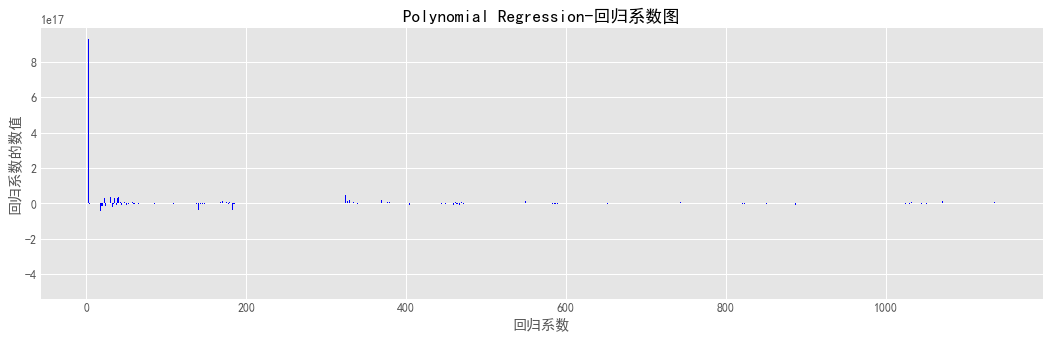

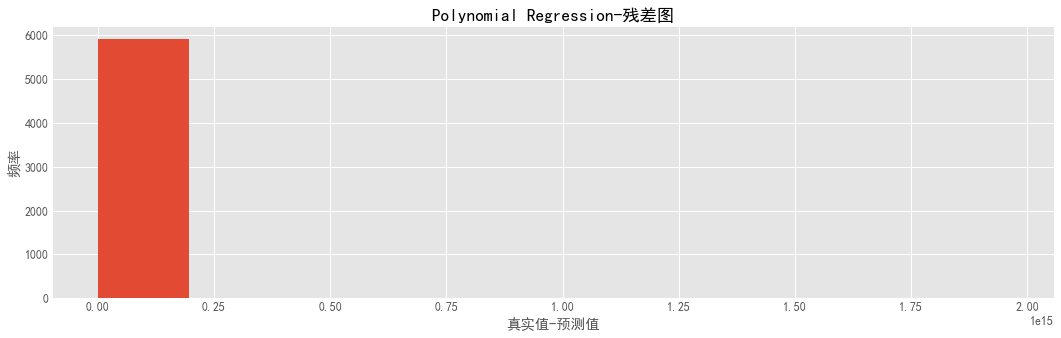

Lasso Regression Model:使用所有特征
交叉验证准确率：63.28180454731174
交叉验证的方差：1.8048910525748456
Lasso Regression Model-RMSE:58685.20604947836


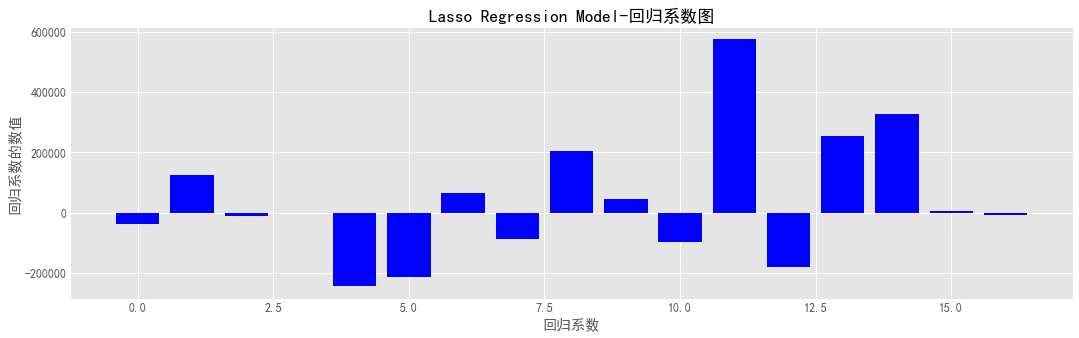

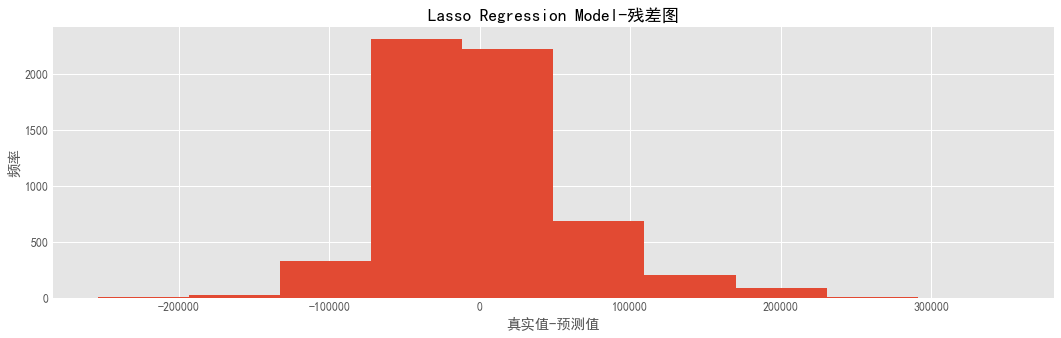

Elastic Nets Regression Model:使用所有特征
交叉验证准确率：15.148033620292273
交叉验证的方差：0.5460544261385081
Elastic Nets Regression Model-RMSE:91407.11085990786


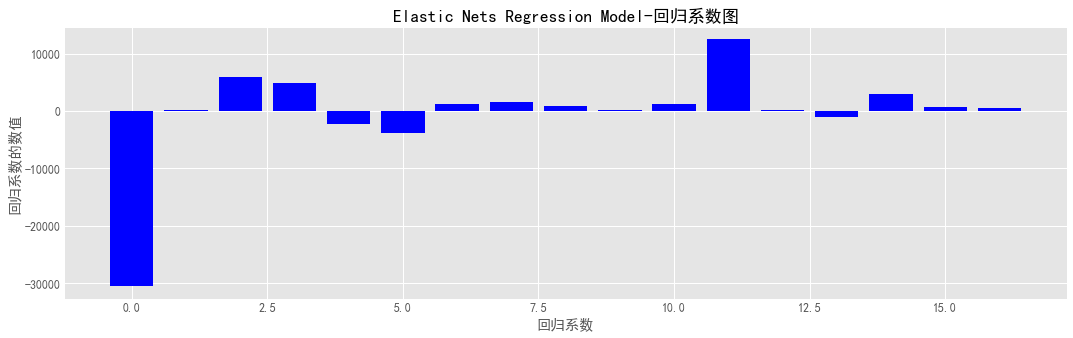

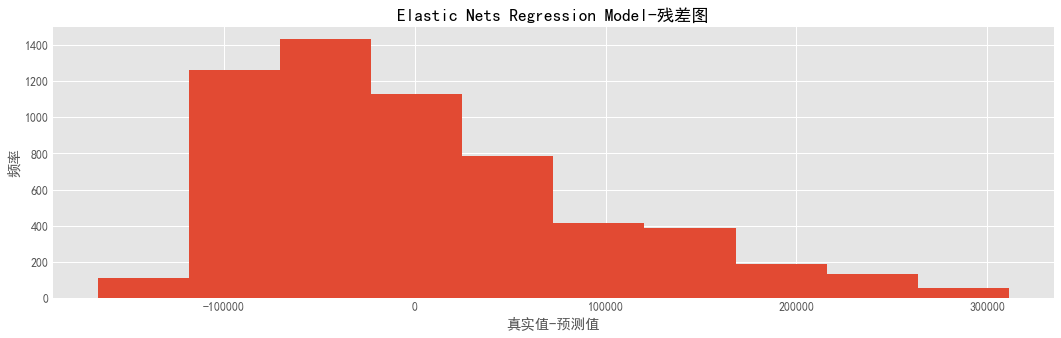

Ridge Regression Model:使用所有特征
交叉验证准确率：63.36267143046281
交叉验证的方差：1.5945979590003365
Ridge Regression Model-RMSE:58797.98570139773


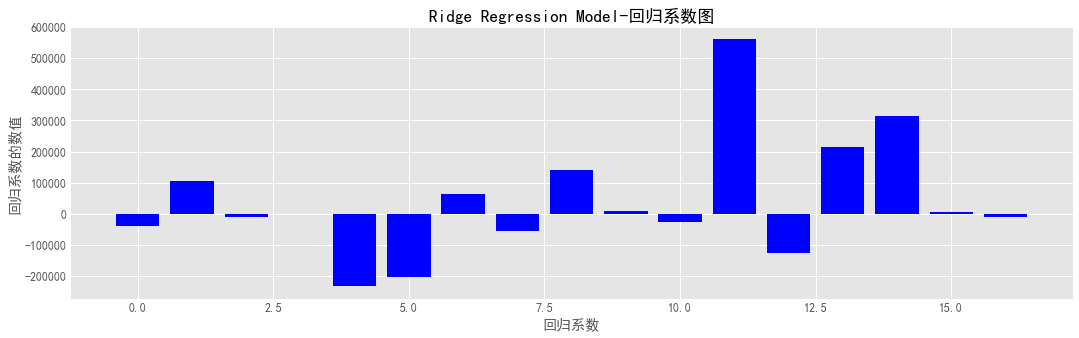

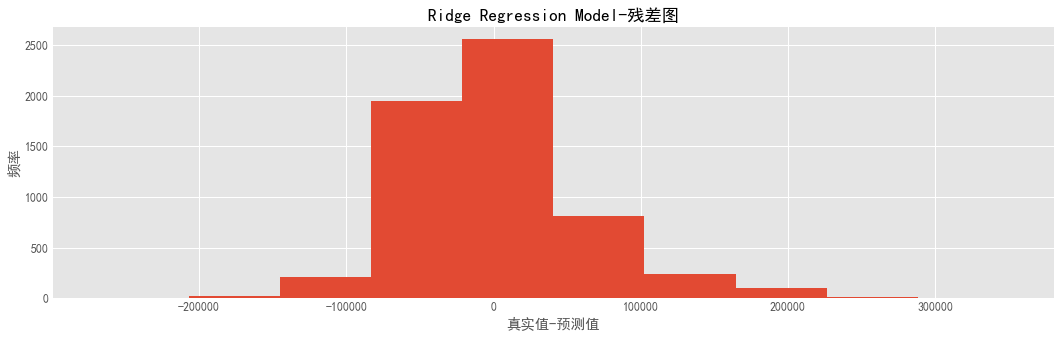

In [42]:
print('Linear regression Model：仅用Median Income一个自变量')
linear_model = regresssor_model(xtrain[:,[11]],ytrain,LinearRegression)
evaluate(linear_model.predict(xtest[:,[11]]),ytest,linear_model,'Linear Regression')
# 画出拟合图
plt.figure(figsize=(16,5))
plt.scatter(xtrain[:,11],ytrain,c=xtrain[:,11])
plt.plot(xtrain[:,11],linear_model.predict(xtrain[:,11:12]),color='red')
plt.title('Linear regression Model：仅用Median Income一个自变量的模型拟合图')
plt.xlabel('median income')
plt.ylabel('house value')
plt.show()

print('Linear regression Model：使用所有特征')
linear_model2 = regresssor_model(xtrain,ytrain,LinearRegression)
coeff_graph(linear_model2,'Linear Regression')
evaluate(linear_model2.predict(xtest),ytest,linear_model2,'Linear Regression')

print('Polynomial regression Model:仅用Median Income一个自变量')
xtrain_poly,xtest_poly=to_poly(2,xtrain[:,11:12],xtest[:,11:12])
polynomial_model = regresssor_model(xtrain_poly,ytrain,LinearRegression)
coeff_graph(polynomial_model,'Polynomial Regression')
evaluate(polynomial_model.predict(xtest_poly),ytest,polynomial_model,'Polynomial Regression')

print('Polynomial regression Model:使用所有特征')
xtrain_poly2,xtest_poly2 = to_poly(3,xtrain,xtest)
polynomial_model2 = regresssor_model(xtrain_poly2,ytrain,LinearRegression)
coeff_graph(polynomial_model2,'Polynomial Regression')
evaluate(polynomial_model2.predict(xtest_poly2),ytest,polynomial_model2,'Polynomial Regression')

print('Lasso Regression Model:使用所有特征')
lasso_model = regresssor_model(xtrain,ytrain,Lasso)
coeff_graph(lasso_model,'Lasso Regression Model')
evaluate(lasso_model.predict(xtest),ytest,lasso_model,'Lasso Regression Model')

print('Elastic Nets Regression Model:使用所有特征')
elastic_nets_model = regresssor_model(xtrain,ytrain,ElasticNet)
coeff_graph(elastic_nets_model,'Elastic Nets Regression Model')
evaluate(elastic_nets_model.predict(xtest),ytest,elastic_nets_model,'Elastic Nets Regression Model')

print('Ridge Regression Model:使用所有特征')
ridge_model = regresssor_model(xtrain,ytrain,Ridge)
coeff_graph(ridge_model,'Ridge Regression Model')
evaluate(ridge_model.predict(xtest),ytest,ridge_model,'Ridge Regression Model')

* 3.3.6 决策树模型：Decision Tree Model

Decision Tree Model:使用所有特征
交叉验证准确率：55.1575285115331
交叉验证的方差：2.9693393999099134
R-Squared: 0.5750660490819803
Decision Tree Model-RMSE:64714.33378017051


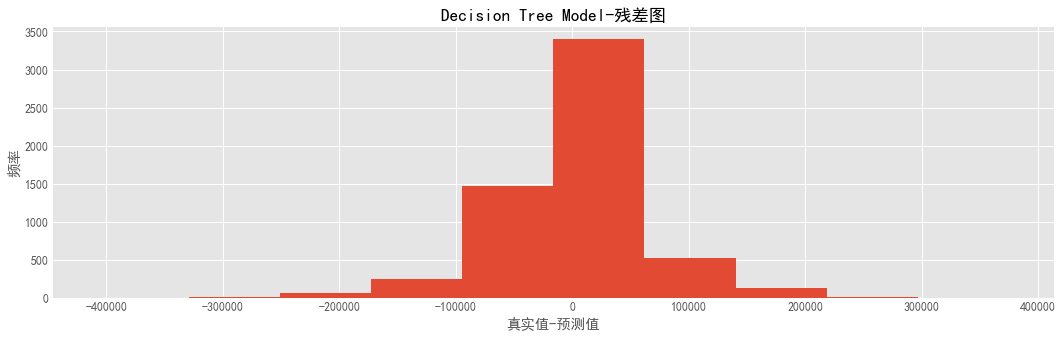

交叉验证标准差： 0.029225288073931356
交叉验证的均值： 0.5479255610627328


In [43]:
# 训练模型
print('Decision Tree Model:使用所有特征')
decision_tree_model = regresssor_model(xtrain,ytrain,DecisionTreeRegressor)
decision_tree_model.fit(xtrain,ytrain)
print('R-Squared:',decision_tree_model.score(xtest,ytest))
# 画出残差图
evaluate(decision_tree_model.predict(xtest),ytest,decision_tree_model,'Decision Tree Model')

# Cross Validation
cv = cross_val_score(decision_tree_model,xtrain,ytrain,scoring='r2',cv=10)
print('交叉验证标准差：',cv.std())
print('交叉验证的均值：',cv.mean())

In [44]:
# 调参：Parameter Tuning
params=[{'max_depth':[2,3,4,5,6,10,20,30,40,50,60,70,100],
         'min_samples_split':[2,3,4,7,10,12],
         'min_samples_leaf' :[1,3,5,10,15,20,25],
         'max_features':['sqrt','log2'],
        }]

gc_dt = GridSearchCV(decision_tree_model,params,cv=10,scoring='r2',n_jobs=-1)
gc_dt.fit(xtrain,ytrain)
gc_dt.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=30,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=12,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

最优R-Squared： 0.653694134651589
Decision Tree Model-RMSE:59631.25161453401


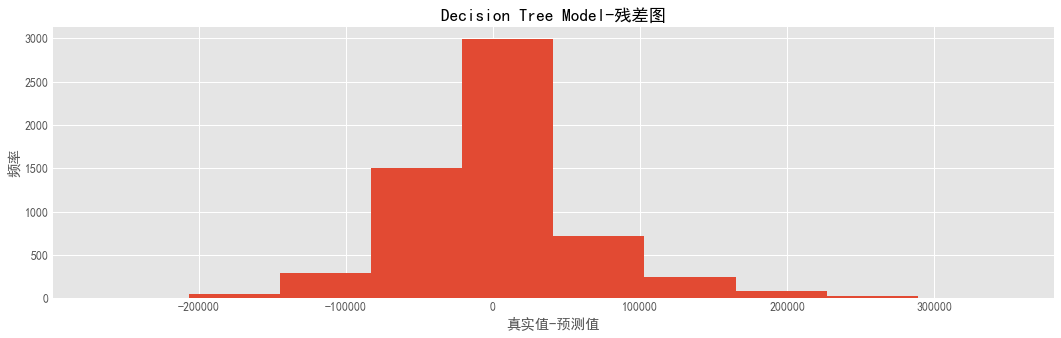

In [45]:
# 使用最优参数重新训练模型
print('最优R-Squared：',gc_dt.best_score_)
decision_tree_model = gc_dt.best_estimator_
decision_tree_model.fit(xtrain,ytrain)
# 画出残差图
evaluate(decision_tree_model.predict(xtest),ytest,decision_tree_model,'Decision Tree Model')

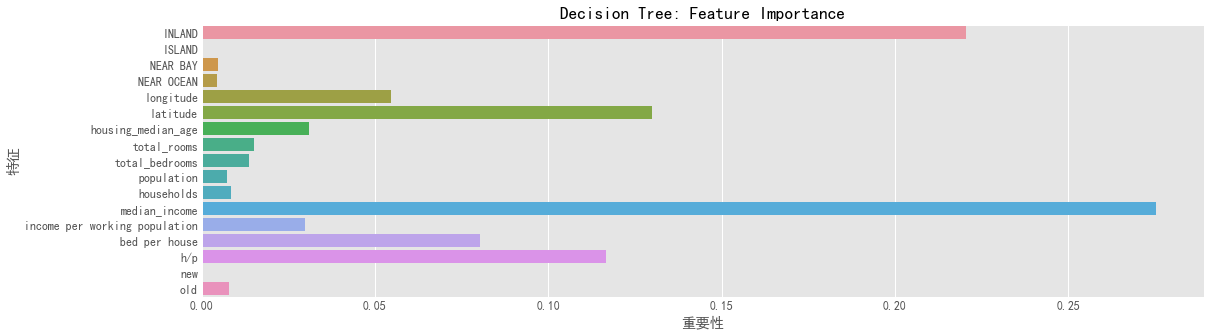

In [46]:
# 查看Feature Importance
plt.figure(figsize=(16,5))
data=pd.DataFrame({'特征':df.columns[df.columns!='median_house_value'].values,"重要性":decision_tree_model.feature_importances_})
sns.barplot(data=data,y='特征',x='重要性')
plt.title('Decision Tree: Feature Importance')
plt.show()

* 3.3.7 随机森林模型：Random Forest Model

R-Squared: 0.7791889022172599
Random Forest Model-RMSE:46649.84631982137


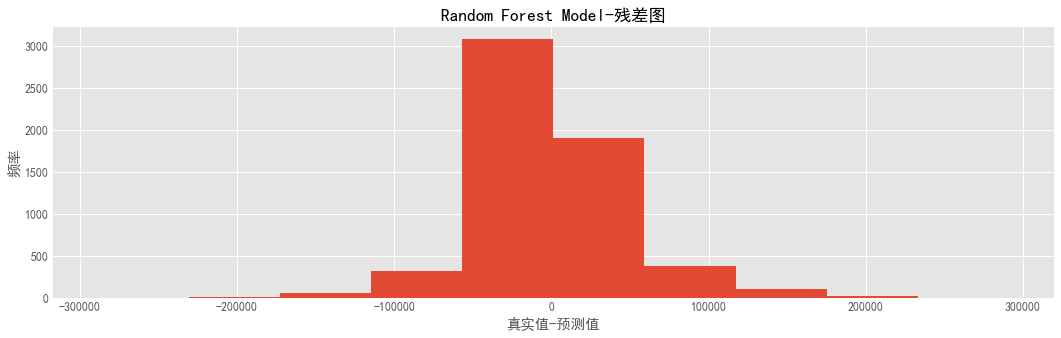

In [47]:
# 训练模型
random_forest_model = RandomForestRegressor(n_estimators=30)
random_forest_model.fit(xtrain,ytrain)
print('R-Squared:',random_forest_model.score(xtest,ytest))
# 画出残差图
evaluate(random_forest_model.predict(xtest),ytest,random_forest_model,'Random Forest Model')

In [48]:
# 调参：Parameter Tuning
# params=[{'n_estimators':[20,30,70,50,100,200,300,400,600,650,630,680],
#          'max_depth':[10,20,30,40,50,60,70,100],
#          'min_samples_split':[2,3,4,5,10],
#          'min_samples_leaf' :[1,2,5,7,10],
#          'bootstrap':[True,False],
#          'max_features':['sqrt','auto']
#         }]
# gc = GridSearchCV(random_forest_model,params,cv=10,scoring='r2')
# gc.fit(xtrain,ytrain)
# gc.best_estimator_

最优R-Squared： 0.7850066322924291
Random Forest Model-RMSE:46031.20036790459


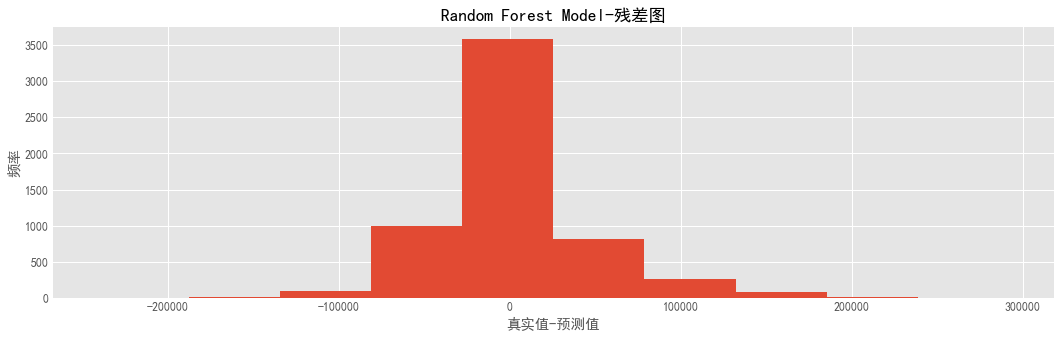

In [50]:
# 使用最优参数重新训练模型
random_forest_model=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=70,
                                          max_features='sqrt', max_leaf_nodes=None,
                                          min_impurity_decrease=0.0, min_impurity_split=None,
                                          min_samples_leaf=1, min_samples_split=2,
                                          min_weight_fraction_leaf=0.0, n_estimators=630, n_jobs=1,
                                          oob_score=False, verbose=0, warm_start=False)
random_forest_model.fit(xtrain,ytrain)
print('最优R-Squared：',random_forest_model.score(xtest,ytest))
# 画出残差图
evaluate(random_forest_model.predict(xtest),ytest,random_forest_model,'Random Forest Model')

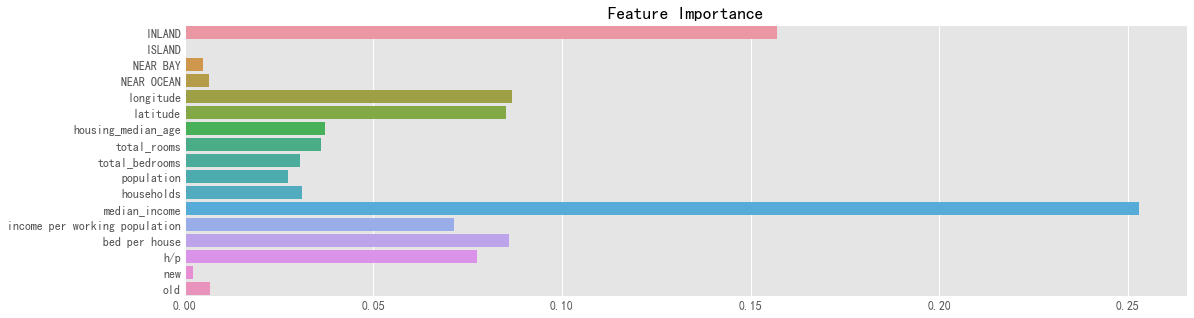

In [64]:
# 查看Feature Importance
plt.figure(figsize=(16,5))
plt.title('Feature Importance')
sns.barplot(data={'特征':df.columns[df.columns!='median_house_value'],'重要性':random_forest_model.feature_importances_},x='重要性',y='特征')
plt.show()

#### 3.4 模型综合对比

| 编号 | 模型                        | 类型            | 自变量                   | R-Squared | RMSE               | 综合表现 |
| ----- | ----------------------------- | ----------------- | --------------------------- | --------- | ------------------ | -------- |
| 3.3.1 | Linear regression Model       | 广义线性模型 | 使用所有特征          | 0.6328    | 58680.28           | 第4名  |
| 3.3.1 | Linear regression Model       | 广义线性模型 | 仅用Median Income一个自变量 | 0.4135    | 76318.44           | 第6名  |
| 3.3.2 | Polynomial regression Model   | 广义线性模型 | 仅用Median Income一个自变量 | 0.4135    | 76253.77           | 第7名  |
| 3.3.2 | Polynomial regression Model   | 广义线性模型 | 使用所有特征          | -0.0120   | 25516240115247.40  | 第9名  |
| 3.3.3 | Lasso Regression Model        | 广义线性模型 | 使用所有特征          | 0.6328    | 58685.21           | 第5名  |
| 3.3.4 | Elastic Nets Regression Model | 广义线性模型 | 使用所有特征          | 0.1515    | 91407.11           | 第8名  |
| 3.3.5 | Ridge Regression Model        | 广义线性模型 | 使用所有特征          | 0.6336    | 58797.99           | 第3名  |
| 3.3.6 | Decision Tree Model           | Cart Trees        | 使用所有特征          | 0.6537    | 59631.25           | 第2名  |
| 3.3.7 | Random Forest Model           | Ensemble Learning | 使用所有特征          | 0.7850    | 46031.20           | 第1名  |

可以看到，R-Squared最大的模型是Random Forest随机森林模型，达到了0.7850，说明对该模型的解释程度达到了78.5%以上，其RMSE也是所有模型中最小的一个，这确实证明了集成模型强大的学习能力，紧随其后的是Decision Tree决策树模型，R-Squared为0.6537，即模型解释度为65.37%，但其RMSE比随机森林高了许多，甚至比线性模型族也稍高一些。在广义线性回归模型族中，Ridge Regression岭回归模型的表现最好，其R-Squared为0.6336，模型解释度达到了63.36%，仅比决策树模型低了2.01%，而其RMSE低于决策树模型,。令人惊讶的是最简单的线性模型表现与Lasso回归模型一样好，其R-Squared均为0.6328，而表现最差的是使用了所有特征作为自变量的Polynomial regression模型。综上所述，使用强大的集成模型——随机森林模型对数据进行拟合，可以很好地达到预测效果。

### 第四部分 结论与建议

在本文中，我们首先对Zillow经济数据库中的城市房价时间序列数据进行了综合分析，了解了美国1996年至2017年的整体房价走势。其中我们对销售价格和租赁价格两大类别分别绘制折线图，可以看到2008年美国金融危机对房价产生了比较大的影响，直到2012年左右才重新恢复上涨趋势，最严重的时候房价跌幅达到了40%以上，而这其中房价最高的加利福尼亚州受到的影响最大，最深跌幅达到了67%，导致2012年房地产市场恢复元气之后其房价依然没有再次回到全国第一的位置，而哥伦比亚特区却坐上了全美房价的头把交椅。

除了房屋销售价格外，我们还对房屋租赁价格进行了分析，与房产销售不同，房屋租赁市场受到经济周期的影响较小，这是由于美国人民的生活习惯决定的，而且不同户型的租赁价格也完全不同，1居室房屋以及公寓这两大户型无论在售价还是租金上都是全国排名前二，而后面户型的排名却有所不同，联排房屋的销售价格是倒数第一，而5居室以上房屋的租赁价格排名倒数第一，这说明在购房上联排房屋是最经济实惠的选择，而在租房上5居室由于面积分摊的原因导致其租金单价最低。

最后我们还对Zillow网站上房屋挂牌时间与其售价和租金的关系进行了研究，发现人们最初都会后悔自己的挂牌价格过低，但是随着时间的推移价格会有较大的降幅，在卖房市场上如果一个房屋超过225天依然没有被出售，则房东会失去信心而不再维护网站上的价格，而租房市场则不同，由于美国人民对租房的需求量较大，Zillow的出租挂牌房屋一直处于比较活跃的状态，而且租赁其价格没有出售价格的波动那样剧烈。

在建模部分，由于时间序列数据建模较为复杂，所以我们选用了Zillow经济数据库中的加州房价数据进行训练和预测，加州房价数据集包含了多个特征，比较适合建立模型进行拟合。在模型选取部分，我们使用了7种机器学习模型，在线性函数族里面选择了比较具有代表性的线性回归模型、多项式回归模型、Lasso回归模型、弹性网回归模型以及岭回归模型，还选取了决策树模型和集成学习模型中的随机森林模型。经过检验，集成学习模型的代表——随机森林模型表现最优，模型解释度达到了75.6%，而其他模型解释度均低于66%，所以如果需要对房价进行预测，则优先选取随机森林模型。

作为宏观经济的重要组成部分，房地产市场总体走势与经济周期运行密不可分。通过分析美国房价历史走势并建立模型预测房价，是十分具有现实意义的。同时我们也需要注意美国因房地产市场的过度炒作而给经济带来的严重后果，这对中国房地产市场的健康良好发展是非常宝贵的经验。